# 👨🏻‍💼Check CV Status

## · We can use the data in two ways:
### · Firstly, we can use the data as a classification task. So we enter our data and in the end the model tells us whether we can be hired or not.
### · Secondly, we can approach the data as a clustering task. That is, we cluster and the cluster with the best indicators becomes our real candidate.

## · Data Columns : 
### · Column	==>     Description
#### job_ad_id	   ==>  Unique ID associated with the advertisement.
#### job_city	==> City where the job was located.
#### job_industry  ==> Industry of the job.
#### job_type	==>  Type of role.
#### job_fed_contractor 	==>  Indicator for if the employer is a federal contractor.
#### job_equal_opp_employer  ==>  Indicator for if the employer is an Equal Opportunity Employer.
#### job_ownership  ==>  The type of company, e.g. a nonprofit or a private company.
#### job_req_any  ==>  Indicator for if any job requirements are listed. If so, the other job_req_* fields give more detail.
#### job_req_communication  ==>  Indicator for if communication skills are required.
#### job_req_education 	==>  Indicator for if some level of education is required.
#### job_req_min_experience  ==>  Amount of experience required.
#### job_req_computer 	==>  Indicator for if computer skills are required.
#### job_req_organization  ==>  Indicator for if organization skills are required.
#### job_req_school  ==>  Level of education required.
#### received_callback  ==>  Indicator for if there was a callback from the job posting for the person listed on this resume.
#### firstname	 ==>  The first name used on the resume.
#### race   ==>  Inferred race associated with the first name on the resume.
#### gender   ==>  Inferred gender associated with the first name on the resume.
#### years_college    ==>  Years of college education listed on the resume.
#### college_degree    ==>   Indicator for if the resume listed a college degree.
#### honors	 ==>    Indicator for if the resume listed that the candidate has been awarded some honors.
#### worked_during_school  ==>  Indicator for if the resume listed working while in school.
#### years_experience   ==>  Years of experience listed on the resume.
#### computer_skills    ==>   Indicator for if computer skills were listed on the resume. These skills were adapted for listings, though the skills were assigned independently of other details on the resume.
#### special_skills   ==>  Indicator for if any special skills were listed on the resume.
#### volunteer   ==>     Indicator for if volunteering was listed on the resume.
#### military   ==>    Indicator for if military experience was listed on the resume.
#### employment_holes   	==>    Indicator for if there were holes in the person's employment history.
#### has_email_address  	==>    Indicator for if the resume lists an email address.
#### resume_quality   ==>   Each resume was generally classified as either lower or higher quality.

## · Business understanding – What does the business need?

### The main goal of the project is to find out how suitable people's CVs are for the available vacancy.
### In the available data, people's information and whether their cvs are favorable or not are written as a result. Thus, we enter our information and find out whether our CV is suitable or not.

## · Data understanding – What data do we have / need? Is it clean?

In [719]:
#Let's import libraries
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import linregress
from scipy.stats import boxcox
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [720]:
#load dataset
df = pd.read_csv('resume_mail.csv')

In [721]:
#Let's look at data frame
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [722]:
#Firstly , let's look at info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4867 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [723]:
#Let's find data types of columns 
df.dtypes

job_ad_id                   int64
job_city                   object
job_industry               object
job_type                   object
job_fed_contractor        float64
job_equal_opp_employer      int64
job_ownership              object
job_req_any                 int64
job_req_communication       int64
job_req_education           int64
job_req_min_experience     object
job_req_computer            int64
job_req_organization        int64
job_req_school             object
received_callback           int64
firstname                  object
race                       object
gender                     object
years_college               int64
college_degree              int64
honors                      int64
worked_during_school        int64
years_experience            int64
computer_skills             int64
special_skills              int64
volunteer                   int64
military                    int64
employment_holes            int64
has_email_address           int64
resume_quality

In [724]:
#Let's look at describe of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_ad_id,4870.0,651.777823,388.690698,1.0,306.25,647.0,979.75,1344.0
job_fed_contractor,3102.0,0.114765,0.318789,0.0,0.00,0.0,0.00,1.0
job_equal_opp_employer,4870.0,0.291170,0.454349,0.0,0.00,0.0,1.00,1.0
job_req_any,4870.0,0.787269,0.409281,0.0,1.00,1.0,1.00,1.0
job_req_communication,4870.0,0.124846,0.330578,0.0,0.00,0.0,0.00,1.0
job_req_education,4870.0,0.106776,0.308860,0.0,0.00,0.0,0.00,1.0
job_req_computer,4870.0,0.437166,0.496087,0.0,0.00,0.0,1.00,1.0
job_req_organization,4870.0,0.072690,0.259654,0.0,0.00,0.0,0.00,1.0
received_callback,4870.0,0.080493,0.272083,0.0,0.00,0.0,0.00,1.0
years_college,4870.0,3.618480,0.714997,0.0,3.00,4.0,4.00,4.0


In [725]:
#Let's look at counts of value for each column
for i in df.columns:
    print(f"{i} columns:")
    print('--------------------------------------')
    print(df[i].value_counts())
    print('======================================\n\n\n')

job_ad_id columns:
--------------------------------------
job_ad_id
384     4
63      4
1020    4
324     4
1019    4
       ..
547     2
1161    2
548     2
701     2
909     2
Name: count, Length: 1323, dtype: int64



job_city columns:
--------------------------------------
job_city
Chicago    2704
Boston     2166
Name: count, dtype: int64



job_industry columns:
--------------------------------------
job_industry
other_service                    1558
business_and_personal_service    1304
wholesale_and_retail_trade       1042
finance_insurance_real_estate     414
manufacturing                     404
transportation_communication      148
Name: count, dtype: int64



job_type columns:
--------------------------------------
job_type
secretary       1621
retail_sales     818
manager          741
sales_rep        736
clerical         578
supervisor       376
Name: count, dtype: int64



job_fed_contractor columns:
--------------------------------------
job_fed_contractor
0.0    2746
1.

In [726]:
#Let's look at count of unique values
df.nunique()

job_ad_id                 1323
job_city                     2
job_industry                 6
job_type                     6
job_fed_contractor           2
job_equal_opp_employer       2
job_ownership                4
job_req_any                  2
job_req_communication        2
job_req_education            2
job_req_min_experience      12
job_req_computer             2
job_req_organization         2
job_req_school               4
received_callback            2
firstname                   36
race                         2
gender                       2
years_college                5
college_degree               2
honors                       2
worked_during_school         2
years_experience            44
computer_skills              2
special_skills               2
volunteer                    2
military                     2
employment_holes             2
has_email_address            2
resume_quality               2
dtype: int64

In [727]:
#Let's examine null values
df.isnull().sum()

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                3
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64

In [728]:
#Let's look at more null columns
for i in df.columns:
    nullv = df[i].isnull().sum()
    if df[i].isnull().sum() > 0.3 * len(df):
        print(i , nullv)

job_fed_contractor 1768
job_req_min_experience 2746


In [729]:
#Let's delete columns with more nulls
del df['job_fed_contractor']
del df['job_req_min_experience']

In [730]:
#Let's look at other columns which have null values
df[df.isna().any(axis=1)]

,job_ad_id,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
273,462,Chicago,other_service,supervisor,1,NaN,1,0,0,0,...,0,1,6,1,0,0,0,0,0,low
402,490,Boston,business_and_personal_service,secretary,0,NaN,1,0,0,1,...,0,0,13,1,1,0,0,1,0,low
3471,179,Boston,wholesale_and_retail_trade,manager,1,NaN,1,0,0,0,...,0,0,8,1,0,0,0,0,0,low


In [731]:
#Let's fix null values
#Null values are few, so let's remove null values
df.dropna(inplace = True)

In [732]:
#Let's check null values
df.isnull().sum()

job_ad_id                 0
job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

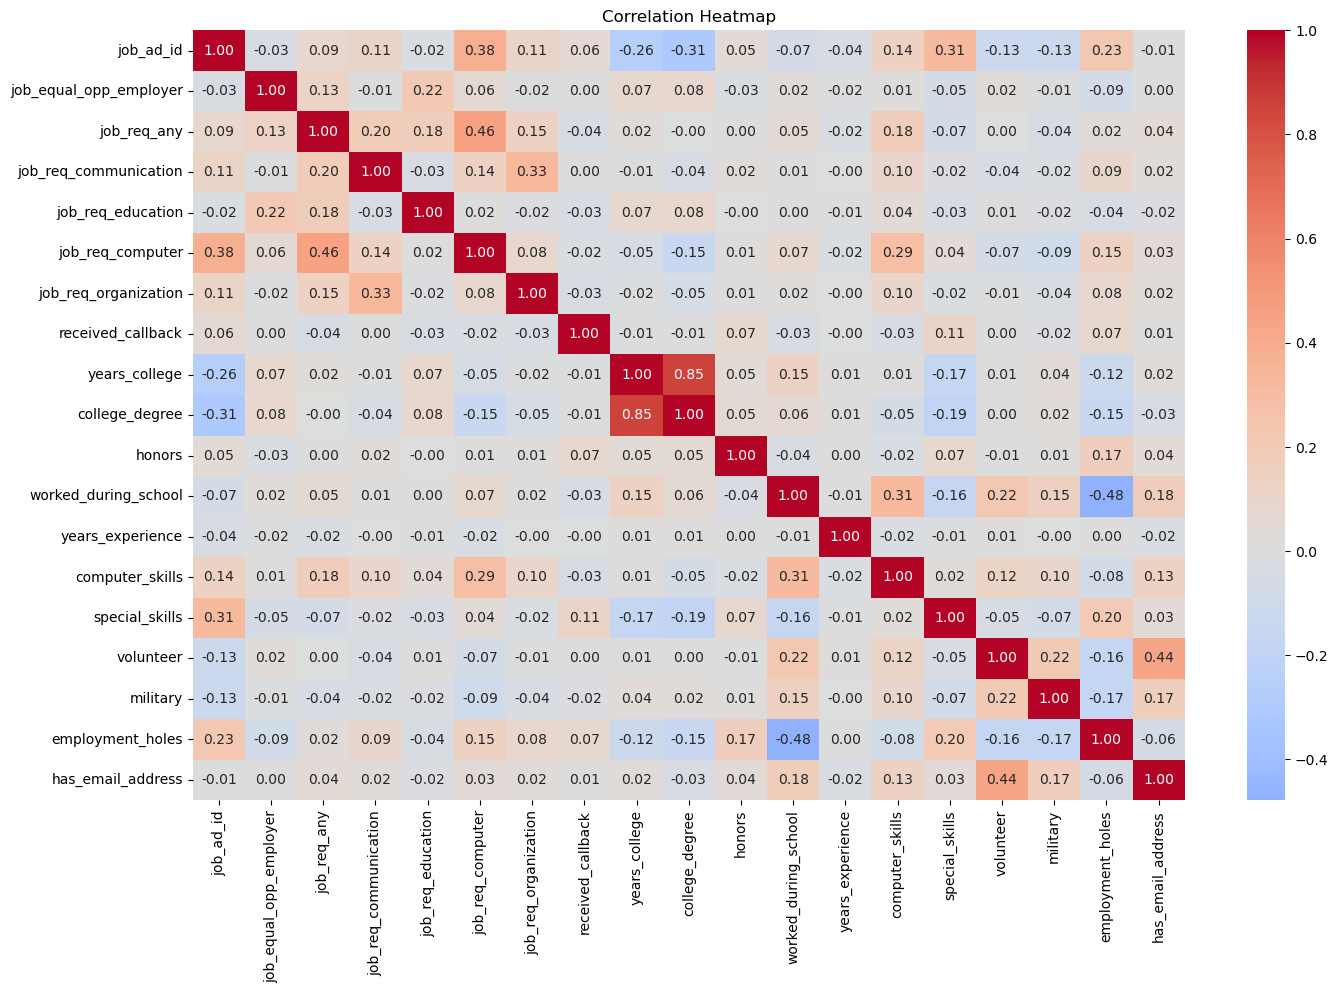

In [733]:
#Let's look at correlation
correlation_matrix = df.select_dtypes(exclude = 'object').corr()
# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Ourliers

In [734]:
#Let's look at max-min values of columns
for i in df.columns:
    max = df[i].max()
    min = df[i].min()
    print(f"Column: {i} , \nMax Value: {max}, \nMin Value: {min}")
    print("=======================================")

Column: job_ad_id , 
Max Value: 1344, 
Min Value: 1
Column: job_city , 
Max Value: Chicago, 
Min Value: Boston
Column: job_industry , 
Max Value: wholesale_and_retail_trade, 
Min Value: business_and_personal_service
Column: job_type , 
Max Value: supervisor, 
Min Value: clerical
Column: job_equal_opp_employer , 
Max Value: 1, 
Min Value: 0
Column: job_ownership , 
Max Value: unknown, 
Min Value: nonprofit
Column: job_req_any , 
Max Value: 1, 
Min Value: 0
Column: job_req_communication , 
Max Value: 1, 
Min Value: 0
Column: job_req_education , 
Max Value: 1, 
Min Value: 0
Column: job_req_computer , 
Max Value: 1, 
Min Value: 0
Column: job_req_organization , 
Max Value: 1, 
Min Value: 0
Column: job_req_school , 
Max Value: some_college, 
Min Value: college
Column: received_callback , 
Max Value: 1, 
Min Value: 0
Column: firstname , 
Max Value: Tyrone, 
Min Value: Aisha
Column: race , 
Max Value: white, 
Min Value: black
Column: gender , 
Max Value: m, 
Min Value: f
Column: years_college 

### Let's determine anomaly values
#### Column: years_experience , 
#### Max Value: 3434, 
#### Min Value: -5

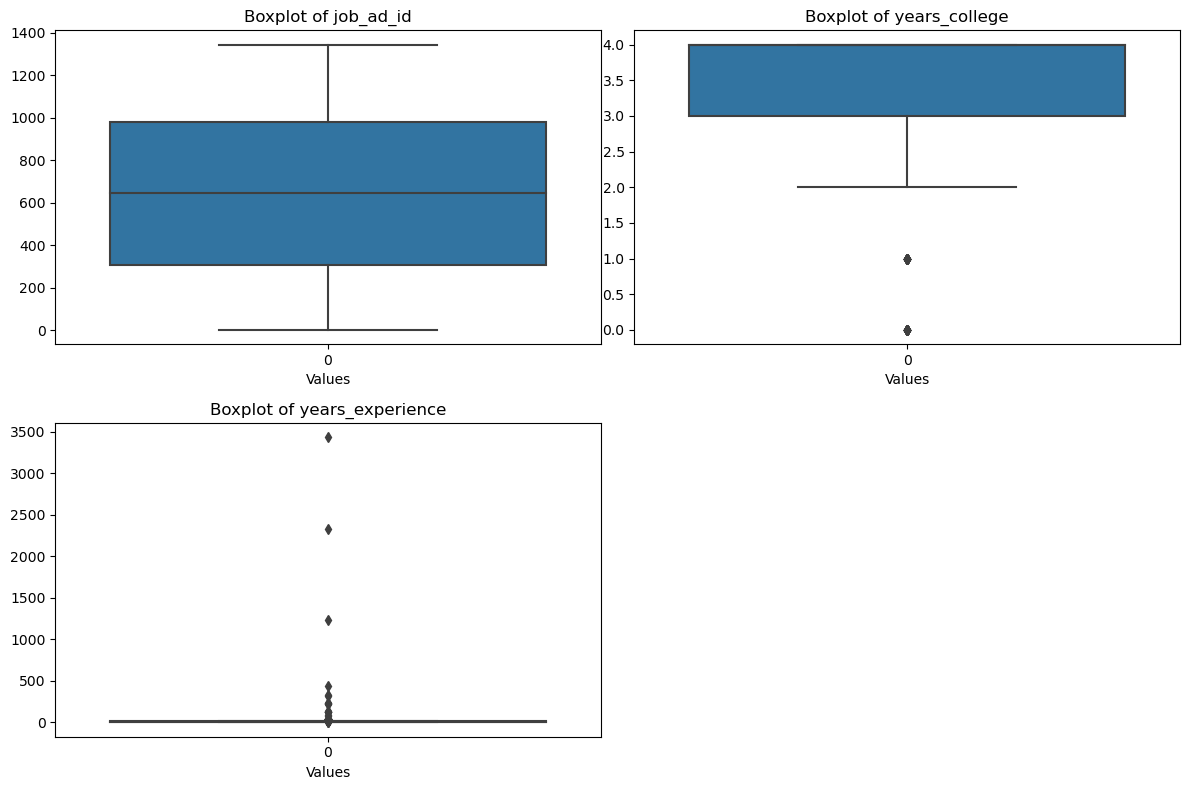

In [735]:
#Let's look at columns with boxplot 
cols = [] 
for i in df.select_dtypes('int').columns:
    if df[i].nunique() > 2:
        cols.append(i)
num_cols = len(df[cols].columns)
num_rows = (num_cols - 1) // 2 + 1
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing
# Loop through columns and create boxplots
for i, column in enumerate(df[cols].columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(data=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Values')
# Remove empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])
plt.tight_layout()
plt.show()

In [736]:
#Let's remove outlier values
df[(df['years_experience']<0) | (df['years_experience']> 40)]

,job_ad_id,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
84,410,Chicago,wholesale_and_retail_trade,manager,0,private,1,0,0,0,...,0,0,212,0,1,1,0,0,0,high
151,435,Chicago,wholesale_and_retail_trade,manager,0,private,1,0,0,0,...,0,0,122,1,1,0,0,1,0,low
215,446,Chicago,business_and_personal_service,retail_sales,0,private,0,0,0,0,...,0,1,1233,1,1,1,0,0,0,high
284,465,Chicago,business_and_personal_service,secretary,0,unknown,1,0,0,1,...,0,1,123,1,1,0,0,0,0,high
369,47,Boston,transportation_communication,retail_sales,0,private,0,0,0,0,...,0,0,222,1,0,0,0,1,0,high
430,295,Boston,wholesale_and_retail_trade,retail_sales,0,private,1,0,0,0,...,0,1,311,1,0,0,0,0,0,low
662,541,Chicago,wholesale_and_retail_trade,secretary,0,private,1,0,0,1,...,0,0,-1,1,0,1,0,1,0,low
742,553,Chicago,finance_insurance_real_estate,secretary,1,public,1,0,0,1,...,0,0,-2,1,0,1,0,1,1,low
854,237,Boston,manufacturing,retail_sales,0,private,1,0,0,0,...,0,1,-4,1,0,1,1,0,1,high
1018,278,Boston,other_service,sales_rep,0,unknown,0,0,0,0,...,0,0,-5,0,0,0,0,1,0,low


In [737]:
#Let's remove outlier values
df = df[(df['years_experience'] >= 0) & (df['years_experience'] < 40)]

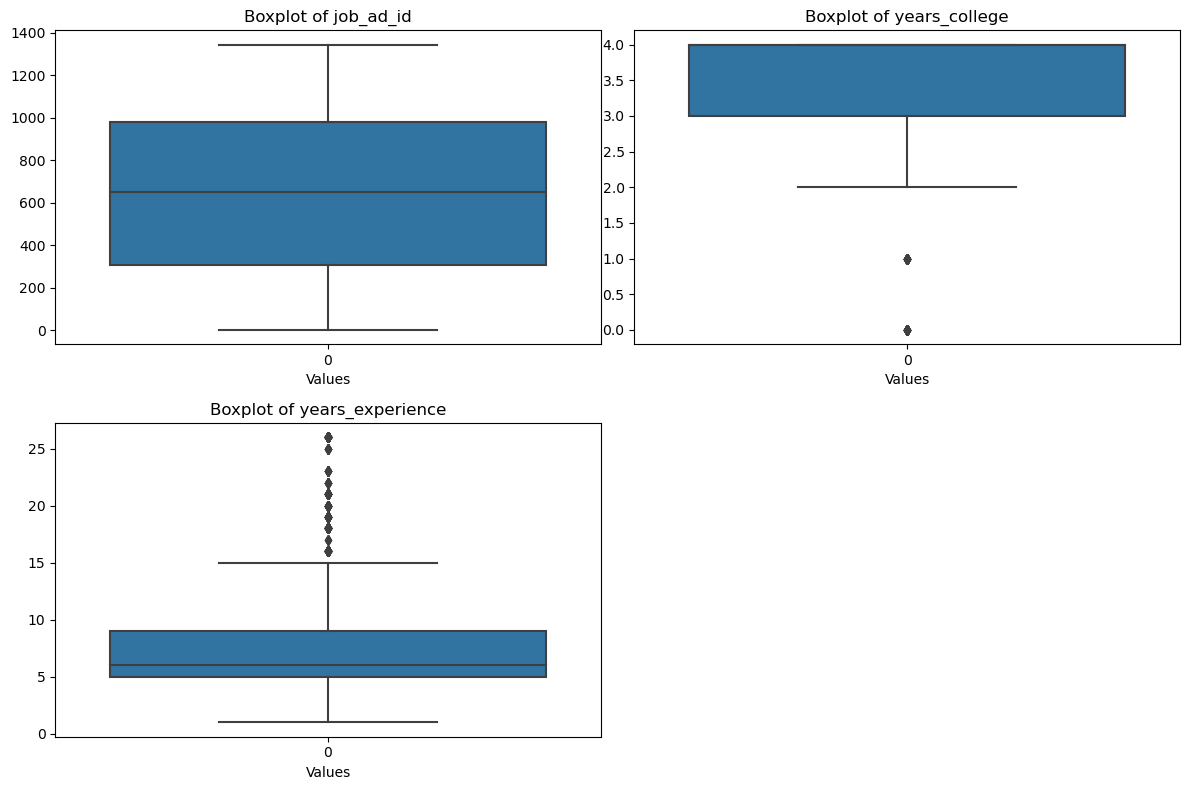

In [738]:
#Let's look at columns with boxplot 
cols = [] 
for i in df.select_dtypes('int').columns:
    if df[i].nunique() > 2:
        cols.append(i)
num_cols = len(df[cols].columns)
num_rows = (num_cols - 1) // 2 + 1
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5) 
# Loop through columns and create boxplots
for i, column in enumerate(df[cols].columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(data=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Values')
# Remove empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])
plt.tight_layout()
plt.show()

# Visualization

In [739]:
#Let's convert represent of target column
df['resume_quality'] = df['resume_quality'].map({'low': 0 , 'high': 1})

In [740]:
#Let's look at df
df.head()

,job_ad_id,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,...,0,0,6,1,0,0,0,1,0,0
1,384,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,...,0,1,6,1,0,1,1,0,1,1
2,384,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,...,0,1,6,1,0,0,0,0,0,0
3,384,Chicago,manufacturing,supervisor,1,unknown,1,0,0,1,...,0,0,6,1,1,1,0,1,1,1
4,385,Chicago,other_service,secretary,1,nonprofit,1,0,0,1,...,0,1,22,1,0,0,0,0,1,1


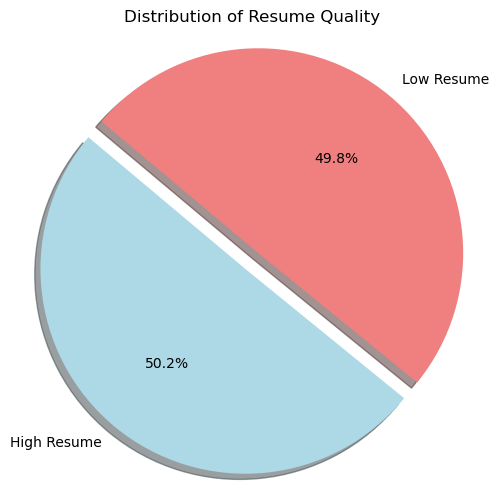

In [741]:
# Firstly let's look at count of resume quality
labels = ['High Resume','Low Resume']
sizes = [30,24]
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
plt.pie(df['resume_quality'].value_counts(), labels=labels,colors=colors,
        autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0))
plt.axis('equal')  
plt.title('Distribution of Resume Quality')

plt.show()

### Result: A relatively high CV is more than a low cv

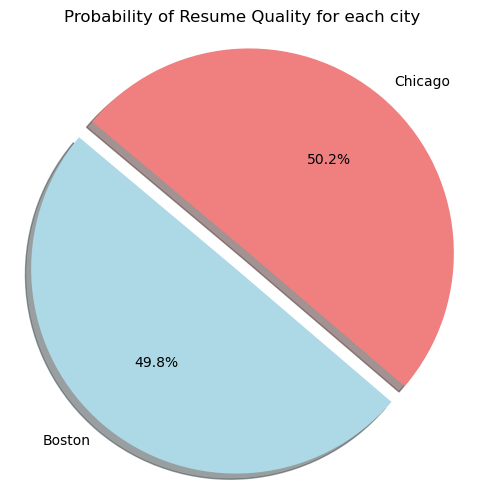

In [742]:
#Let's look at count of resume quality for each city
labels = list(df.groupby(by = 'job_city')['resume_quality'].mean().index)
sizes = [30,24]
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
plt.pie(df.groupby(by = 'job_city')['resume_quality'].mean() , labels=labels,colors=colors,
        autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0))
plt.axis('equal')  
plt.title('Probability of Resume Quality for each city')

plt.show()

### Result: A relatively high CV is more in Chicago than Boston

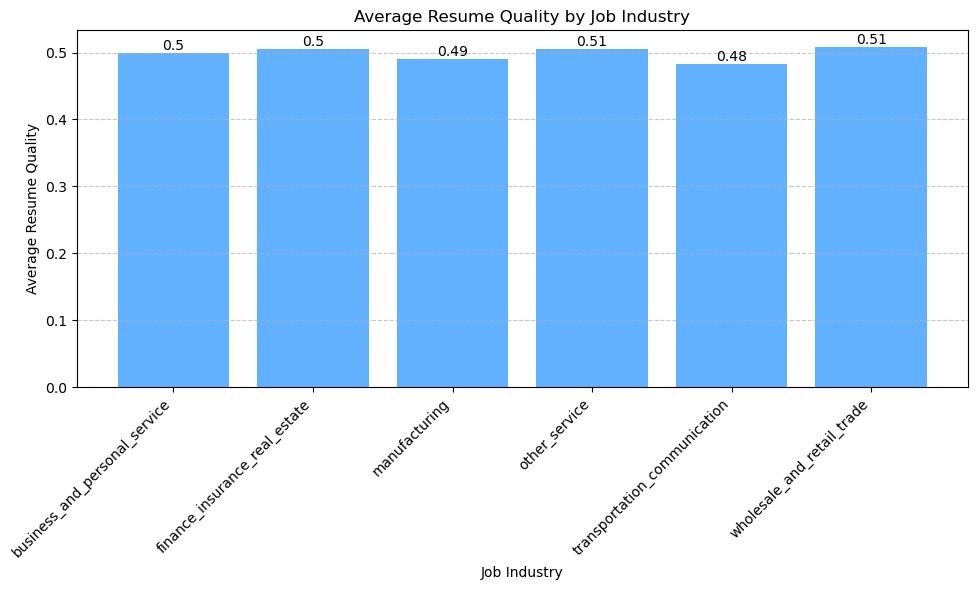

In [743]:
#Let's look at average of resume quality for each job industry
industry_mean_quality = df.groupby(by='job_industry')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Average Resume Quality by Job Industry')
plt.xlabel('Job Industry')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: Max high resume is in 'wholesale_and_retail_trade' industry Min high resume is in 'transportation_communication' 

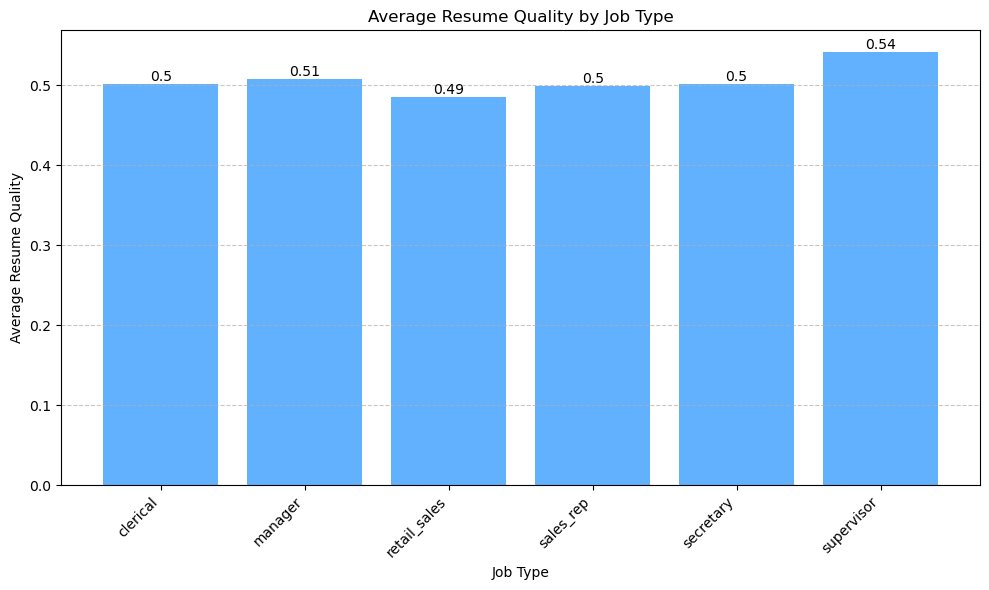

In [744]:
#Let's look at average of resume quality for each job type
industry_mean_quality = df.groupby(by='job_type')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Average Resume Quality by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: Max high resume is in 'supervisor' industry Min high resume is in 'retail_sales' 

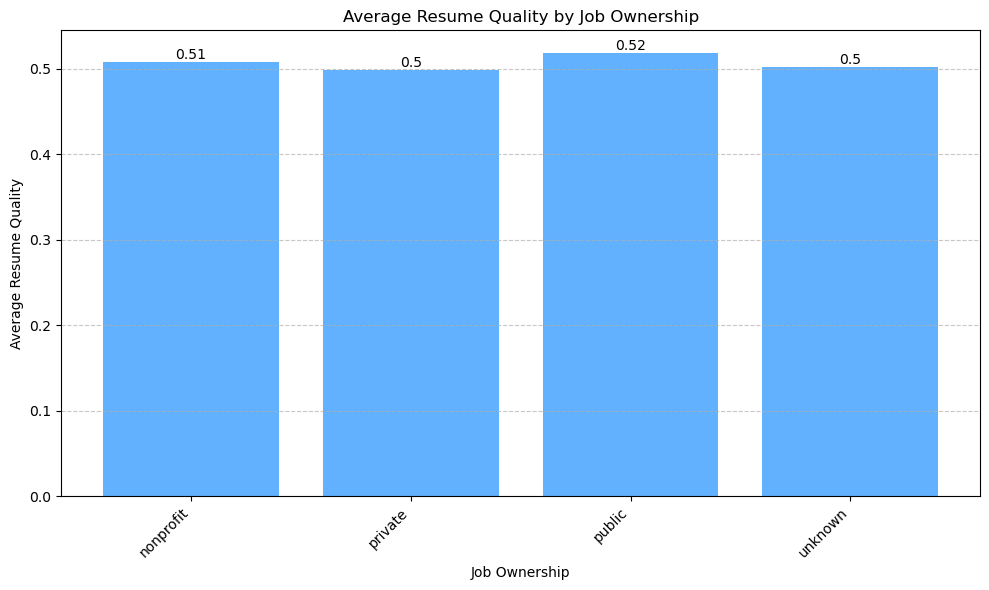

In [745]:
#Let's look at average of resume quality for each job ownership
industry_mean_quality = df.groupby(by='job_ownership')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Average Resume Quality by Job Ownership')
plt.xlabel('Job Ownership')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: Max high resume is in 'public' industry Min high resume is in 'private'  

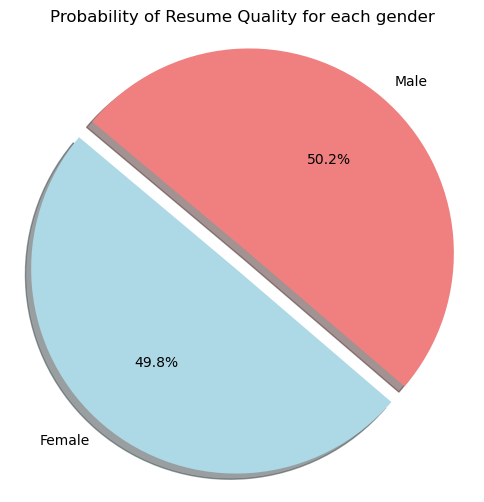

In [746]:
#Let's look at count of resume quality for each gender
labels = ['Female','Male']
sizes = [30,24]
plt.figure(figsize=(6, 6))

colors = ['lightblue', 'lightcoral']
plt.pie(df.groupby(by = 'gender')['resume_quality'].mean() , labels=labels,colors=colors,
        autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0))
plt.axis('equal')  
plt.title('Probability of Resume Quality for each gender')

plt.show()

### Result: High Cv's are relatively observed in men

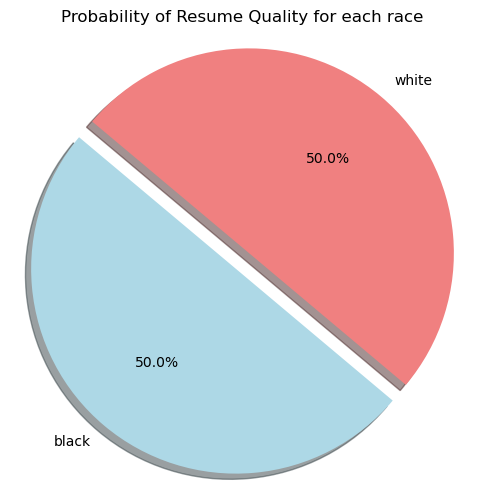

In [747]:
#Let's look at count of resume quality for each gender
labels = df.groupby(by = 'race')['resume_quality'].mean().index
sizes = [30,24]
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
plt.pie(df.groupby(by = 'race')['resume_quality'].mean() , labels=labels,colors=colors,
        autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0))
plt.axis('equal')  
plt.title('Probability of Resume Quality for each race')

plt.show()

### Result: The race column does not matter if CVs are High or Low.

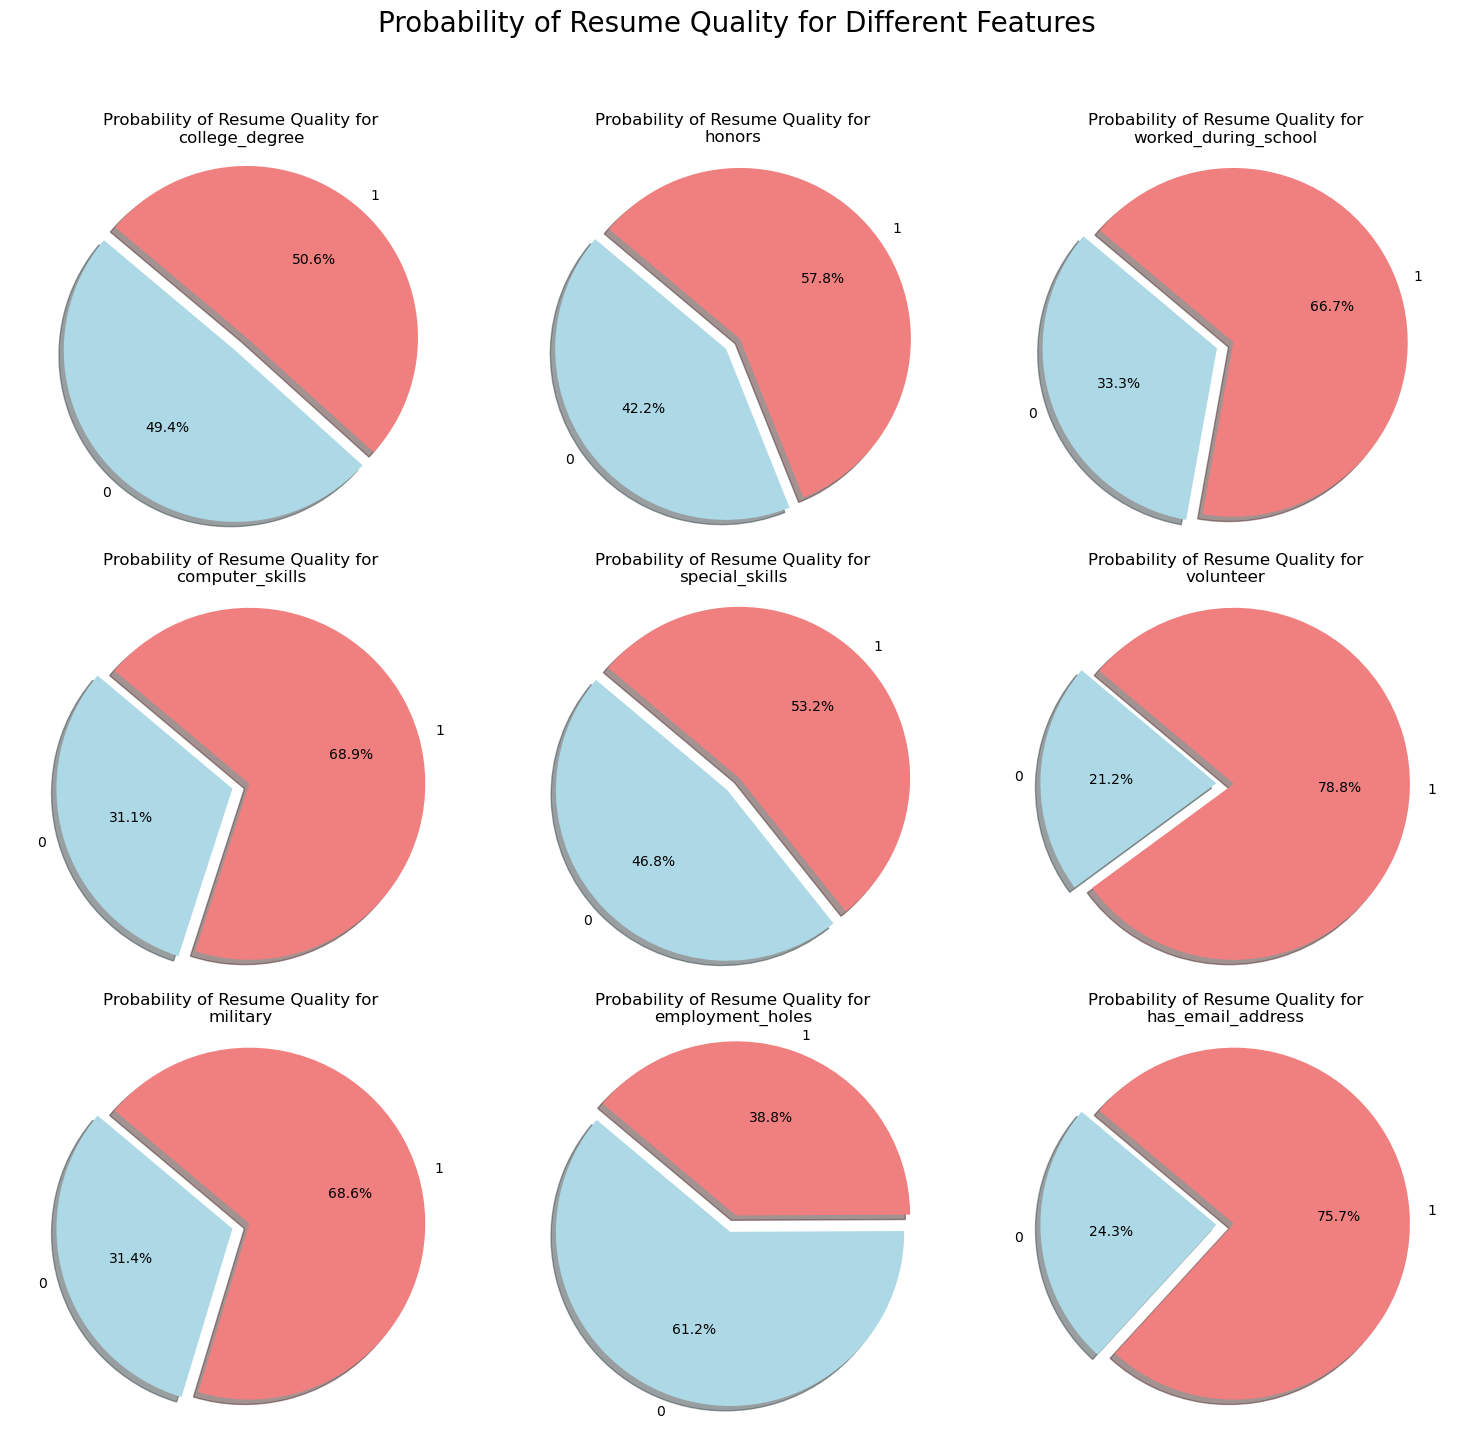

In [748]:
features = ['college_degree', 'honors', 'worked_during_school',
            'computer_skills', 'special_skills', 'volunteer',
            'military', 'employment_holes', 'has_email_address']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) 
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    labels = list(df.groupby(by=feature)['resume_quality'].mean().index)
    sizes = list(df.groupby(by=feature)['resume_quality'].mean())
    
    ax.pie(sizes, labels=labels, colors=colors,
           autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
    ax.set_title(f'Probability of Resume Quality for\n{feature}', fontsize=12)  # Wrapped title for clarity
    ax.axis('equal')
plt.suptitle('Probability of Resume Quality for Different Features', fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Result: The role of Email is important in having a high or low cv.
###             The role of Volunteering is important in whether the CV is high or low.

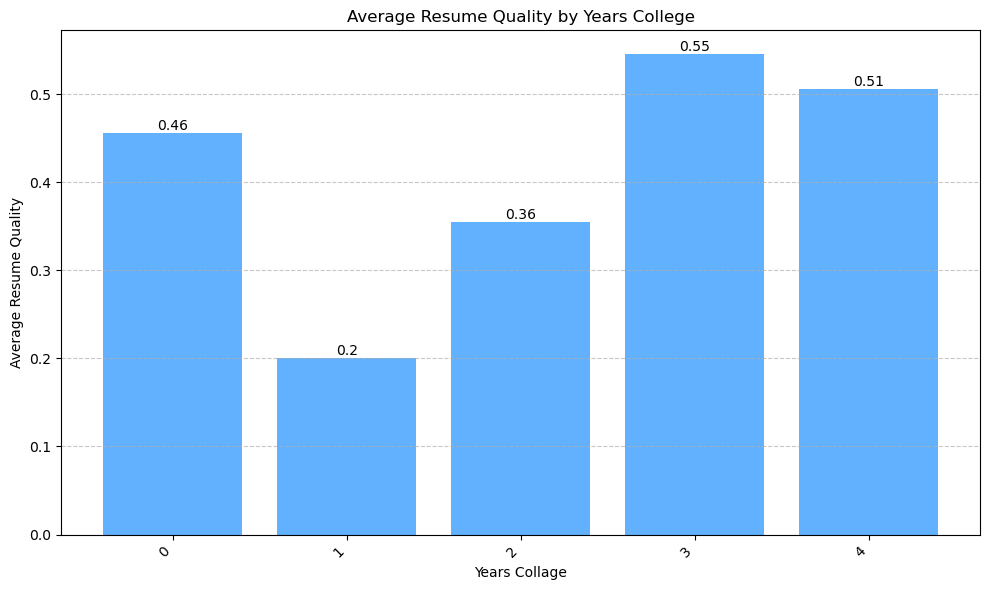

In [749]:
#Let's look at average of resume quality for each job ownership
industry_mean_quality = df.groupby(by='years_college')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Average Resume Quality by Years College')
plt.xlabel('Years Collage')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: Cv is higher in 3-year college students and this feature is importance feature 

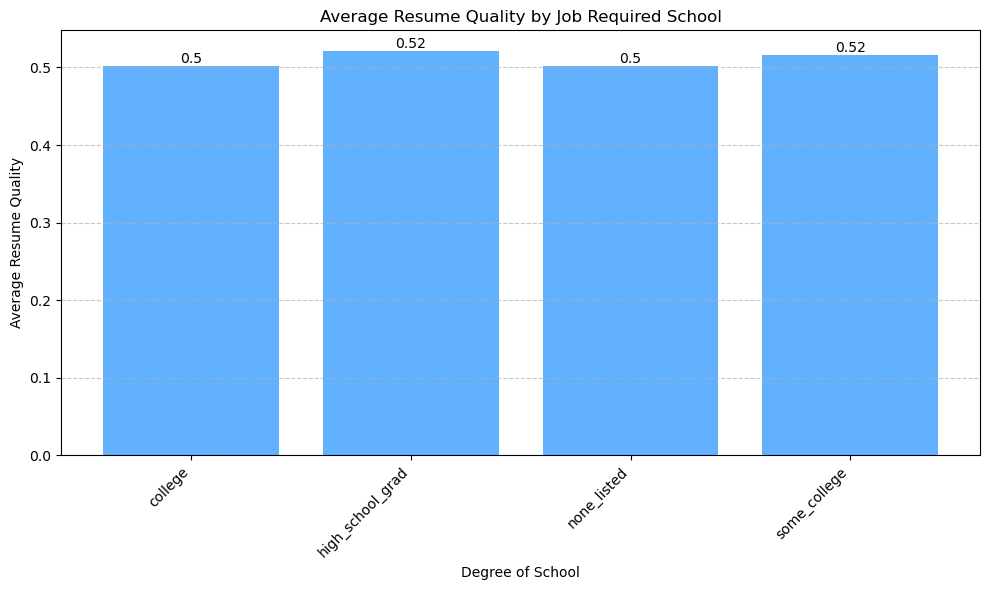

In [750]:
#Let's look at average of resume quality for each school which job required
industry_mean_quality = df.groupby(by='job_req_school')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Average Resume Quality by Job Required School')
plt.xlabel('Degree of School')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: Probability of each of the school degree is almost close to each other.

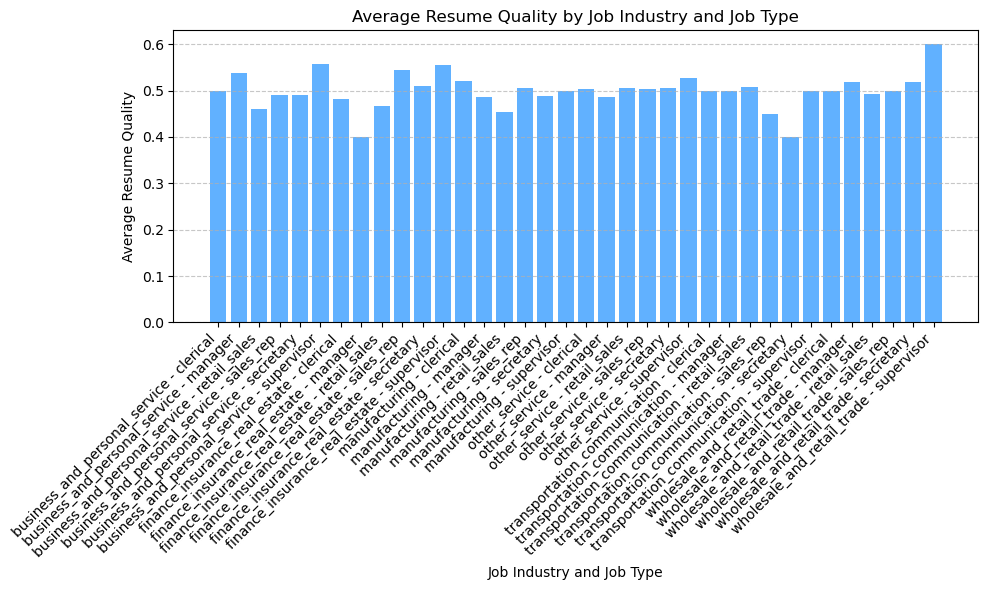

In [751]:
# Group by job industry and job type and calculate the average resume quality
industry_mean_quality = df.groupby(by=['job_industry', 'job_type'])['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
index_strings = [f'{industry} - {job_type}' for industry, job_type in index]
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(index_strings, industry_mean_quality, color='dodgerblue', alpha=0.7)
plt.title('Average Resume Quality by Job Industry and Job Type')
plt.xlabel('Job Industry and Job Type')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

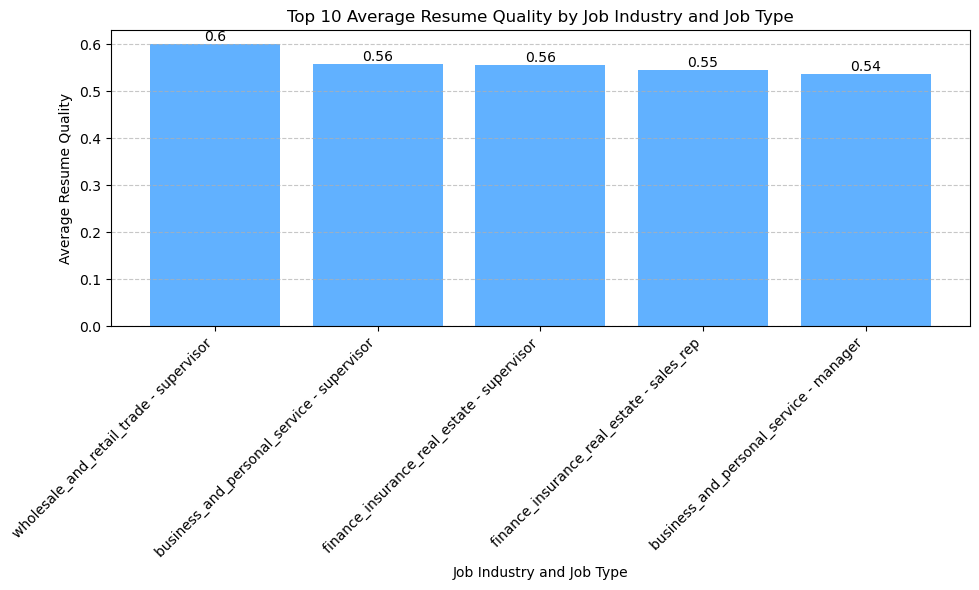

In [752]:
#Let's look at top 5
industry_mean_quality = df.groupby(by=['job_industry', 'job_type'])['resume_quality'].mean()
industry_mean_quality.index = [f'{industry} - {job_type}' for industry, job_type in industry_mean_quality.index]
top_10 = industry_mean_quality.sort_values(ascending=False).head(5)
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10.index, top_10.values, color='dodgerblue', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             round(bar.get_height(), 2), ha='center', va='bottom', color='black', fontsize=10)
plt.title('Top 10 Average Resume Quality by Job Industry and Job Type')
plt.xlabel('Job Industry and Job Type')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Result: More results are shown by supervisor type of wholesaler and trade. 60 percent of CVs are high.

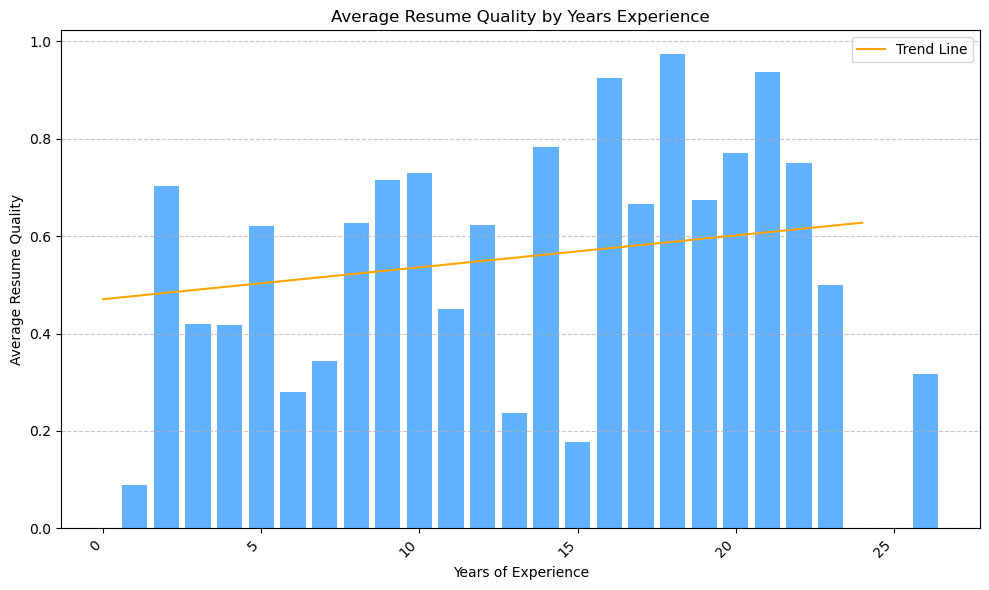

In [753]:
industry_mean_quality = df.groupby(by='years_experience')['resume_quality'].mean()
index = industry_mean_quality.index.tolist()
plt.figure(figsize=(10, 6))  
bars = plt.bar(index, industry_mean_quality, color='dodgerblue', alpha=0.7)
plt.title('Average Resume Quality by Years Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Resume Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Let's calculate linear regression line
x = np.arange(len(index))
y = industry_mean_quality.values
slope, intercept, _, _, _ = linregress(x, y)
regress_line = slope * x + intercept
plt.plot(x, regress_line, color='orange', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()

### Result: Our trend is increasing, which is normal, because the more experience you have, the higher the cv

## Data preparation – How do we organize the data for modeling?

### Changing the type of Values and Get dummies

In [754]:
#Let's remove id,name from data frame
del df['job_ad_id']
del df['firstname']

In [755]:
# Let's change representation of Values
dum_col = ['job_city','job_industry','job_type','job_ownership','race']
df = pd.get_dummies(df, columns = dum_col)

In [756]:
#Let's replace gender (male/female)  with 0/1 
df['gender'] = df['gender'].map({'m':1,'f':0})
df['job_req_school'] = df['job_req_school'].map({'none_listed':0,'college':1,'some_college':2,'high_school_grad':3}) 

In [757]:
# Let's check up data types
df.dtypes

job_equal_opp_employer                        int64
job_req_any                                   int64
job_req_communication                         int64
job_req_education                             int64
job_req_computer                              int64
job_req_organization                          int64
job_req_school                                int64
received_callback                             int64
gender                                        int64
years_college                                 int64
college_degree                                int64
honors                                        int64
worked_during_school                          int64
years_experience                              int64
computer_skills                               int64
special_skills                                int64
volunteer                                     int64
military                                      int64
employment_holes                              int64
has_email_ad

In [758]:
for i in df.select_dtypes(include = 'bool').columns:
    df[i] = df[i].map({True:1,False:0})

#### Okey, all date types is int

### Data Manipulation

In [759]:
# let's find log of columns
for i in df.columns:
    log = np.log(df[i])
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(log)
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

C:\Games\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [760]:
# let's find power of columns
for i in df.columns:
    pow = np.power(df[i],2)
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(pow)
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

Column: job_req_school | Before Corr: 0.0070372827715589 | After Corr: 0.007204272954098547


In [761]:
# let's find power of columns
for i in df.columns:
    pow = np.power(df[i],2)
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(pow)
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

Column: job_req_school | Before Corr: 0.0070372827715589 | After Corr: 0.007204272954098547


In [762]:
# let's find sqrt of columns
for i in df.columns:
    sqrt = np.power(df[i],0.5)
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(sqrt)
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

In [763]:
# let's find boxcox of columns
for i in df.columns:
    constant = 1
    transformed_feature, lambda_ = boxcox(df[i] + constant)
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(pd.Series(transformed_feature))
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

Column: job_req_communication | Before Corr: -0.004915086725865111 | After Corr: 0.012697556309789552
Column: job_req_education | Before Corr: 0.005696967010670132 | After Corr: 0.009792953803376884
Column: job_req_organization | Before Corr: 0.005032692289219493 | After Corr: -0.010062081659025635
Column: job_req_school | Before Corr: 0.0070372827715589 | After Corr: 0.009788594133320122
Column: job_city_Boston | Before Corr: -0.0029993077786281083 | After Corr: -0.010343663807006914
Column: job_city_Chicago | Before Corr: 0.0029993077786281083 | After Corr: 0.010343663807006687
Column: job_industry_business_and_personal_service | Before Corr: -0.0033364015390420776 | After Corr: -0.003696471740067073
Column: job_industry_finance_insurance_real_estate | Before Corr: 0.0015126006065454233 | After Corr: -0.019240338836589318
Column: job_industry_manufacturing | Before Corr: -0.0074140489631819816 | After Corr: 0.008416944972410245
Column: job_industry_other_service | Before Corr: 0.0042

In [764]:
# let's write values as z score
for i in df.columns:
    mean = df[i].mean()
    std_dev = df[i].std()
    z_scores = (df[i] - mean) / std_dev
    corrb = df['resume_quality'].corr(df[i])
    corra = df['resume_quality'].corr(z_scores)
    if np.abs(corra) > np.abs(corrb):
        print(f"Column: {i} | Before Corr: {corrb} | After Corr: {corra}")

Column: job_equal_opp_employer | Before Corr: 0.013306808338586686 | After Corr: 0.013306808338586693
Column: job_req_communication | Before Corr: -0.004915086725865111 | After Corr: -0.004915086725865206
Column: job_req_education | Before Corr: 0.005696967010670132 | After Corr: 0.005696967010670304
Column: job_req_organization | Before Corr: 0.005032692289219493 | After Corr: 0.005032692289219563
Column: received_callback | Before Corr: 0.025839716179224814 | After Corr: 0.025839716179225022
Column: gender | Before Corr: 0.0027984296798762042 | After Corr: 0.002798429679876221
Column: college_degree | Before Corr: 0.010314740226868927 | After Corr: 0.01031474022686911
Column: computer_skills | Before Corr: 0.23409176549414185 | After Corr: 0.23409176549414237
Column: military | Before Corr: 0.3150526978531996 | After Corr: 0.3150526978532004
Column: job_city_Boston | Before Corr: -0.0029993077786281083 | After Corr: -0.0029993077786281087
Column: job_city_Chicago | Before Corr: 0.002

##### Result: We don't get well feature with feature engineering. The correlation increases by 0.0000001, which is a bad indicator.

### Feature Mining 

#### 1) Sum of columns and check correlation 

In [765]:
#Let's check sum of columns
for i in df.columns:
    for y in df.columns: 
        sum = df[i] + df[y]
        corrbi = df['resume_quality'].corr(df[i])
        corrby = df['resume_quality'].corr(df[y])
        corra = df['resume_quality'].corr(sum)
        if np.abs(corra) > np.max([np.abs(corrbi), np.abs(corrby)]) + 0.05:
            print(f"Columns: {i}  | Before Corr: {corrbi}  ||  {y} | Before Corr: {corrby} | After Corr: {corra}")
            print('=============================================================================================')

Columns: worked_during_school  | Before Corr: 0.3206476604024588  ||  military | Before Corr: 0.3150526978531996 | After Corr: 0.40984768279755857
Columns: military  | Before Corr: 0.3150526978531996  ||  worked_during_school | Before Corr: 0.3206476604024588 | After Corr: 0.40984768279755857


##### Note: Even , the correlation of the new variable must be greater than the correlation of the column which the maximum correlation

In [766]:
#Data Frame
df.head()

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,job_req_school,received_callback,gender,years_college,...,job_type_retail_sales,job_type_sales_rep,job_type_secretary,job_type_supervisor,job_ownership_nonprofit,job_ownership_private,job_ownership_public,job_ownership_unknown,race_black,race_white
0,1,1,0,0,1,0,0,0,0,4,...,0,0,0,1,0,0,0,1,0,1
1,1,1,0,0,1,0,0,0,0,3,...,0,0,0,1,0,0,0,1,0,1
2,1,1,0,0,1,0,0,0,0,4,...,0,0,0,1,0,0,0,1,1,0
3,1,1,0,0,1,0,0,0,0,3,...,0,0,0,1,0,0,0,1,1,0
4,1,1,0,0,1,1,0,0,0,3,...,0,0,1,0,1,0,0,0,0,1


#### 2) Subtract of columns and check correlation 

In [767]:
#Let's check minus of columns
for i in df.columns:
    for y in df.columns: 
        diff = df[i] - df[y]
        corrbi = df['resume_quality'].corr(df[i])
        corrby = df['resume_quality'].corr(df[y])
        corra = df['resume_quality'].corr(diff)
        if np.abs(corra) > np.max([np.abs(corrbi), np.abs(corrby)]) + 0.05:
            print(f"Columns: {i}  | Before Corr: {corrbi}  ||  {y} | Before Corr: {corrby} | After Corr: {corra}")
            print('=============================================================================================')

Columns: computer_skills  | Before Corr: 0.23409176549414185  ||  employment_holes | Before Corr: -0.21844776745362152 | After Corr: 0.3042676874717529
Columns: employment_holes  | Before Corr: -0.21844776745362152  ||  computer_skills | Before Corr: 0.23409176549414185 | After Corr: -0.3042676874717529


#### 3) Multiply of columns and check correlation 

In [768]:
#Let's check multiply of columns
for i in df.columns:
    for y in df.columns: 
        mltp = df[i] * df[y]
        corrbi = df['resume_quality'].corr(df[i])
        corrby = df['resume_quality'].corr(df[y])
        corra = df['resume_quality'].corr(mltp)
        if np.abs(corra) > np.max([np.abs(corrbi), np.abs(corrby)]) + 0.05:
            print(f"Columns: {i}  | Before Corr: {corrbi}  ||  {y} | Before Corr: {corrby} | After Corr: {corra}")
            print('=============================================================================================')

Columns: college_degree  | Before Corr: 0.010314740226868927  ||  special_skills | Before Corr: 0.061263551355578746 | After Corr: 0.11702837680918816
Columns: years_experience  | Before Corr: 0.08892564229587216  ||  special_skills | Before Corr: 0.061263551355578746 | After Corr: 0.1419285588798729
Columns: special_skills  | Before Corr: 0.061263551355578746  ||  college_degree | Before Corr: 0.010314740226868927 | After Corr: 0.11702837680918816
Columns: special_skills  | Before Corr: 0.061263551355578746  ||  years_experience | Before Corr: 0.08892564229587216 | After Corr: 0.1419285588798729


#### 4) Divide of columns and check correlation 

In [769]:
#Let's check divided of columns
for i in df.columns:
    for y in df.columns: 
        div = df[i] / df[y]
        corrbi = df['resume_quality'].corr(df[i])
        corrby = df['resume_quality'].corr(df[y])
        corra = df['resume_quality'].corr(div)
        if np.abs(corra) > np.max([np.abs(corrbi), np.abs(corrby)]) + 0.01:
            print(f"Columns: {i}  | Before Corr: {corrbi}  ||  {y} | Before Corr: {corrby} | After Corr: {corra}")
            print('=============================================================================================')

Columns: employment_holes  | Before Corr: -0.21844776745362152  ||  years_experience | Before Corr: 0.08892564229587216 | After Corr: -0.25178228431788174


#### 5) Finding average from two columns and checking correlation score

In [770]:
#Let's check divided of columns
for i in df.columns:
    for y in df.columns: 
        avg = (df[i] + df[y])/2
        corrbi = df['resume_quality'].corr(df[i])
        corrby = df['resume_quality'].corr(df[y])
        corra = df['resume_quality'].corr(avg)
        if np.abs(corra) > np.max([np.abs(corrbi), np.abs(corrby)]) + 0.07:
            print(f"Columns: {i}  | Before Corr: {corrbi}  ||  {y} | Before Corr: {corrby} | After Corr: {corra}")
            print('=============================================================================================')

Columns: worked_during_school  | Before Corr: 0.3206476604024588  ||  military | Before Corr: 0.3150526978531996 | After Corr: 0.40984768279755857
Columns: military  | Before Corr: 0.3150526978531996  ||  worked_during_school | Before Corr: 0.3206476604024588 | After Corr: 0.40984768279755857


#### 6) Select some columns related to college times and check the correlation

In [771]:
#Let's check sum of years_college , college_degree , honors , years_experience , computer_skills
mltp = df['years_college'] + df['honors'] + df['years_experience'] + df['special_skills']
corra = df['resume_quality'].corr(mltp)
corrb_values = [
    df['resume_quality'].corr(df['years_college']),
    df['resume_quality'].corr(df['honors']),
    df['resume_quality'].corr(df['years_experience']),
    df['resume_quality'].corr(df['special_skills'])]
corrb = np.max(np.abs(corrb_values))
if np.abs(corra) > np.abs(corrb):
    print(f"Before Corr: {corrb} || After Corr: {corra}")
    print('=============================================================================================')

Before Corr: 0.08892564229587216 || After Corr: 0.10309663516746312


#### 7) Create new functions, give 1 point to the candidate who is military and volunteer

In [772]:
#Let's create new column which both military and voluteer is 1
df['milvol'] = df.apply(lambda row: 1 if row['volunteer'] == 1 and row['military'] == 1 else 0, axis=1)

In [773]:
df['milvol'].corr(df['resume_quality'])

0.284503969180971

##### A candidate who is both military and volunteer has more chances.

#### 8) Adding one by one new columns and check up correlation

In [774]:
#Let's check up correlation (one by one add new column to list)
a = []
for i in df.columns:
    sum_columns = df[a + [i]].sum(axis=1)  # Sum the selected columns element-wise
    a.append(i)
    correlation = df['resume_quality'].corr(sum_columns)
    print(a, correlation)
    print("=========================================================================")

['job_equal_opp_employer'] 0.013306808338586686
['job_equal_opp_employer', 'job_req_any'] 0.010527005737515948
['job_equal_opp_employer', 'job_req_any', 'job_req_communication'] 0.006837018185858283
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education'] 0.007910789363741203
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer'] 0.009771259626710355
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization'] 0.010261937112939136
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization', 'job_req_school'] 0.010864239338586887
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization', 'job_req_school', 'received_callback'] 0.015427630356795946
['job_equal_opp_employer', 'job_req_any', 'job_

#### 9) Add the columns one by one and condition that if the sum is different from 0 then write 1 else write 0 and finally check the correlation.

In [775]:
#Let's check correlation for adding one by one columns to list 
a = []
for i in df.columns:
    a.append(i)
    corr_sum = df[a].sum(axis=1).apply(lambda x: 1 if x != 0 else 0)
    corr = df['resume_quality'].corr(corr_sum)
    print(a, corr)
    print("=========================================================================")

['job_equal_opp_employer'] 0.013306808338586686
['job_equal_opp_employer', 'job_req_any'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization', 'job_req_school'] 0.002731088017164494
['job_equal_opp_employer', 'job_req_any', 'job_req_communication', 'job_req_education', 'job_req_computer', 'job_req_organization', 'job_req_school', 'received_callback'] 0.01278581112028465
['job_equal_opp_employer', 'job_req_any', 'job_r

In [776]:
#Correlation
df.corr()['resume_quality']

job_equal_opp_employer                        0.013307
job_req_any                                   0.001960
job_req_communication                        -0.004915
job_req_education                             0.005697
job_req_computer                              0.008290
job_req_organization                          0.005033
job_req_school                                0.007037
received_callback                             0.025840
gender                                        0.002798
years_college                                 0.047232
college_degree                                0.010315
honors                                        0.081915
worked_during_school                          0.320648
years_experience                              0.088926
computer_skills                               0.234092
special_skills                                0.061264
volunteer                                     0.612006
military                                      0.315053
employment

#### 10) Create new feature, give 1 point to the candidate who is received_callback and has_email_address

In [777]:
#Let's look at new features correlation 
b = [1 if (row['received_callback'] == 1) and (row['has_email_address'] == 1) 
     else 0 for index, row in df.iterrows()]
df['resume_quality'].corr(pd.Series(b))

0.007156640693344593

#### 11) Find years in School and Work Experience Ratio (this can help capture the balance)

In [778]:
#Let's create new features and find years ratio (years_college ,years_experience)
df['years_ratio'] = np.where(df['years_college'] == 0, 1,df["years_experience"]/df["years_college"])
corr = df['years_ratio'].corr(df['resume_quality'])
corrcoll = df["years_college"].corr(df['resume_quality'])
correxp = df["years_experience"].corr(df['resume_quality'])

print(f'·Correlation of College years: {corrcoll}')
print(f'·Correlation of Experience: {correxp}')      
print(f'·Correlation of New Feature: {corr}')

df[["years_experience","years_college","years_ratio"]].head()

·Correlation of College years: 0.04723182168074739
·Correlation of Experience: 0.08892564229587216
·Correlation of New Feature: 0.07870683509750813


,years_experience,years_college,years_ratio
0,6,4,1.500000
1,6,3,2.000000
2,6,4,1.500000
3,6,3,2.000000
4,22,3,7.333333


#### 12) Summarize the columns that positively affect quality ("honors", "computer_skills", "volunteer", and "military".)

In [779]:
#Let's create new column and sum some columns
df['positive_col'] = df[['honors',"computer_skills","volunteer","military"]].sum(axis = 1)
corr = df['positive_col'].corr(df['resume_quality'])

print(f'·Correlation of New Feature: {corr}')

df[['honors',"computer_skills", "volunteer","military",'positive_col','resume_quality']].head()

·Correlation of New Feature: 0.6219841159884534


,honors,computer_skills,volunteer,military,positive_col,resume_quality
0,0,1,0,0,1,0
1,0,1,1,1,3,1
2,0,1,0,0,1,0
3,0,1,1,0,2,1
4,0,1,0,0,1,1


###### Great correlation: 0.62 🎉

#### 13) Calculate cumulative measure of overall experience by summing "years_college" and "years_experience"                 

In [780]:
#Let's create new column and sum experience years
df['overall_exp'] = df[['years_experience','years_college']].sum(axis = 1)
corr = df['overall_exp'].corr(df['resume_quality'])

print(f'·Correlation of New Feature: {corr}')

df[['years_experience','years_college','overall_exp','resume_quality']].head()

·Correlation of New Feature: 0.09455335742164284


,years_experience,years_college,overall_exp,resume_quality
0,6,4,10,0
1,6,3,9,1
2,6,4,10,0
3,6,3,9,1
4,22,3,25,1


#### 14) Create new feature that counts the number of potential negative attributes like "worked_during_school" (which might indicate a lack of focus on studies) &  "employment_holes" (which might indicate gaps in employment history). 

In [781]:
#Let's create a new function that returns 1 if the workplace is free or works during school hours and 0 otherwise
df['work_hole'] = df[["worked_during_school","employment_holes"]].sum(axis = 1)
df['workhole_binary'] = np.where((df["worked_during_school"] == 0) & (df["employment_holes"] == 0), 0 , 1)

corr = df['work_hole'].corr(df['resume_quality'])
corr1 = df['workhole_binary'].corr(df['resume_quality'])

print(f'·Correlation of New Feature: {corr}')
print(f'·Correlation of New Feature: {corr1}')

df[["worked_during_school","employment_holes", 'work_hole','workhole_binary','resume_quality']].iloc[23:28]

·Correlation of New Feature: 0.09945385540342541
·Correlation of New Feature: 0.13032479110605338


,worked_during_school,employment_holes,work_hole,workhole_binary,resume_quality
23,0,1,1,1,0
24,0,0,0,0,1
25,1,1,2,1,0
26,0,0,0,0,1
27,0,1,1,1,1


In [782]:
for i in ['years_ratio','work_hole','overall_exp']:
    del df[i]

### Result:
#### New features : 
#### 1) worked_during_school + military / 2    (worked_during_school Before Corr: 0.32  ||  military | Before Corr: 0.31 |After Corr: 0.40)
#### 2) years_experience * special_skills        (years_experience  | Before Corr: 0.08  ||  special_skills | Before Corr: 0.06 | After Corr: 0.14)
#### 3) computer_skills - employment_holes  (computer_skills  | Before Corr: 0.23  ||  employment_holes | Before Corr: -0.21 | After Corr: 0.30)

In [783]:
#Let's add new column
#1)
df['avg_milwork'] = (df['military'] + df['worked_during_school'])/2
#2)
df['mltp_experspecskill']  = df['years_experience'] * df['special_skills']
#3)
df['substract_compemphole'] = df['computer_skills'] - df['employment_holes']

 ### Dimension Reduction (reducing columns)(PCA)

In [784]:
#Let's look at correlation
df.corr()['resume_quality']

job_equal_opp_employer                        0.013307
job_req_any                                   0.001960
job_req_communication                        -0.004915
job_req_education                             0.005697
job_req_computer                              0.008290
job_req_organization                          0.005033
job_req_school                                0.007037
received_callback                             0.025840
gender                                        0.002798
years_college                                 0.047232
college_degree                                0.010315
honors                                        0.081915
worked_during_school                          0.320648
years_experience                              0.088926
computer_skills                               0.234092
special_skills                                0.061264
volunteer                                     0.612006
military                                      0.315053
employment

In [785]:
#Let's choose columns which we use in pca
a = []
for i in df.columns:
    corr = df[i].corr(df['resume_quality'])
    if np.abs(corr) < 0.1:
        a.append(i)

In [786]:
#let's use PCA for dimension reduction
X = df[a]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

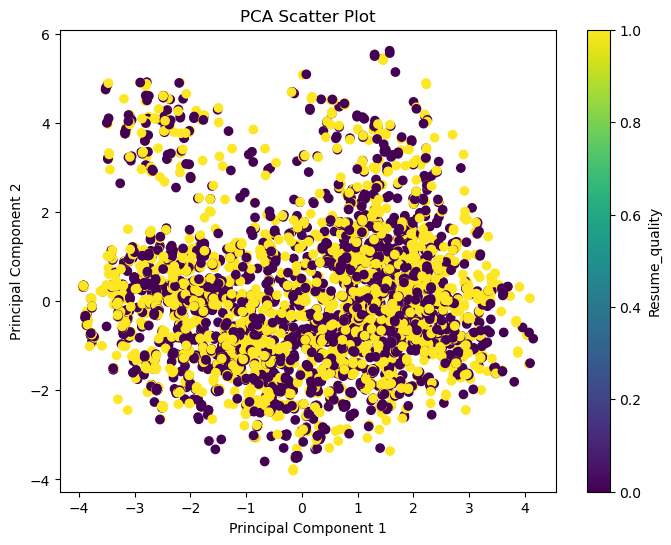

In [787]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['resume_quality'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Resume_quality')
plt.show()

In [788]:
#Let's look at correlations
for i in range(1,n_components+1):
    print(f'PCA{i} : CORR ==> ', df['resume_quality'].corr(pca_df[f'PC{i}']))

PCA1 : CORR ==>  0.007965162225280632
PCA2 : CORR ==>  0.00304628609541733
PCA3 : CORR ==>  0.015674723970950665


In [789]:
#Let's look at correlation 
correlation_results = {}
for column in a:
    correlation = df[column].corr(df['resume_quality'])
    correlation_results[column] = correlation
for column, correlation in correlation_results.items():
    print(f"Correlation between '{column}' and 'resume_quality': {correlation:.2f}")

Correlation between 'job_equal_opp_employer' and 'resume_quality': 0.01
Correlation between 'job_req_any' and 'resume_quality': 0.00
Correlation between 'job_req_communication' and 'resume_quality': -0.00
Correlation between 'job_req_education' and 'resume_quality': 0.01
Correlation between 'job_req_computer' and 'resume_quality': 0.01
Correlation between 'job_req_organization' and 'resume_quality': 0.01
Correlation between 'job_req_school' and 'resume_quality': 0.01
Correlation between 'received_callback' and 'resume_quality': 0.03
Correlation between 'gender' and 'resume_quality': 0.00
Correlation between 'years_college' and 'resume_quality': 0.05
Correlation between 'college_degree' and 'resume_quality': 0.01
Correlation between 'honors' and 'resume_quality': 0.08
Correlation between 'years_experience' and 'resume_quality': 0.09
Correlation between 'special_skills' and 'resume_quality': 0.06
Correlation between 'job_city_Boston' and 'resume_quality': -0.00
Correlation between 'job_c

In [790]:
#Let's get o.o1 and more corr
col = []
for column in a:
    correlation = df[column].corr(df['resume_quality'])
    if np.abs(round(np.abs(correlation),2)) >= 0.01:
        col.append(column)

In [791]:
#let's use PCA for dimension reduction
X = df[col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
n_components = 4
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

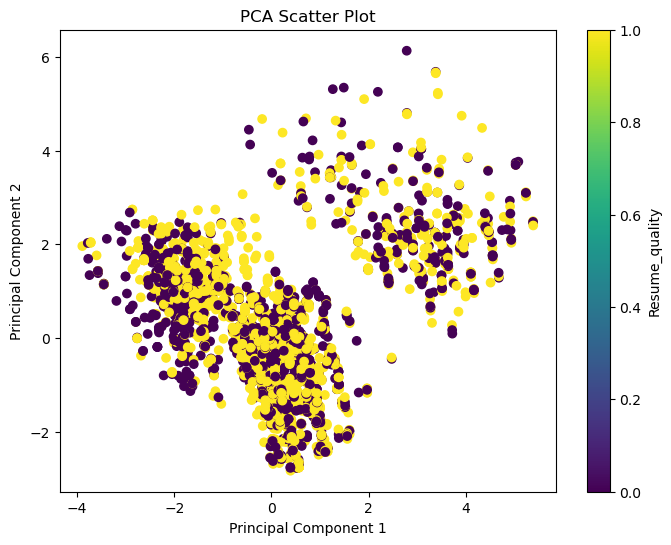

In [792]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['resume_quality'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Resume_quality')
plt.show()

In [793]:
#Let's look at correlations
for i in range(1,n_components+1):
    print(f'PCA{i} : CORR ==> ', df['resume_quality'].corr(pca_df[f'PC{i}']))

PCA1 : CORR ==>  0.004471122508307719
PCA2 : CORR ==>  0.011983450718156471
PCA3 : CORR ==>  -0.0021262758564773118
PCA4 : CORR ==>  0.0001368651288867221


In [794]:
#Let's find low correlation
lowcorr =[]
for column in df.columns:
    corrx = df[column].corr(df['resume_quality'])
    if np.abs(corrx) < 0.1: 
        lowcorr.append(column)

In [795]:
#let's use PCA for dimension reduction
X = df[lowcorr]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
n_components = 4
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

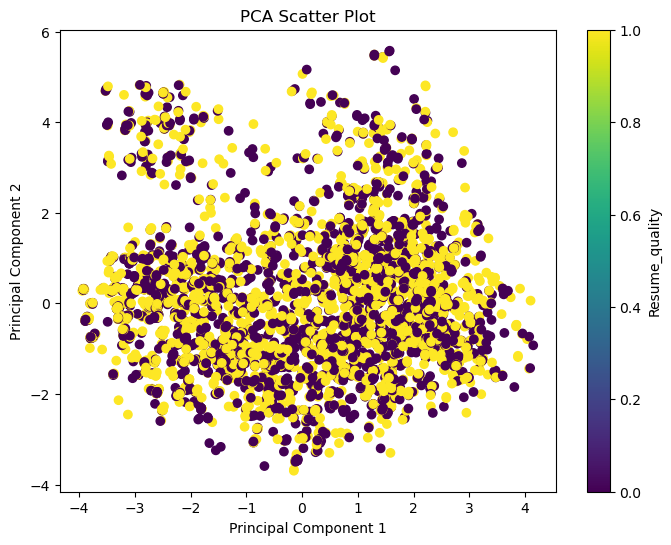

In [796]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['resume_quality'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Resume_quality')
plt.show()

In [797]:
#Let's look at correlations
for i in range(1,n_components+1):
    print(f'PCA{i} : CORR ==> ', df['resume_quality'].corr(pca_df[f'PC{i}']))

PCA1 : CORR ==>  0.007936754891016841
PCA2 : CORR ==>  0.0030673106127670534
PCA3 : CORR ==>  0.015482296537120117
PCA4 : CORR ==>  0.010030560948036308


In [798]:
#Let's find columns which correlations between 0.1 and 0.3
midcorr = []
for i in df.columns:
    corr = df[i].corr(df['resume_quality'])
    if np.abs(corr) < 0.3 and np.abs(corr) > 0.1:
        print(i,corr)
        midcorr.append(i)

computer_skills 0.23409176549414185
employment_holes -0.21844776745362154
milvol 0.284503969180971
workhole_binary 0.13032479110605338
mltp_experspecskill 0.14192855887987293


In [799]:
#let's use PCA for dimension reduction
X = df[midcorr]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

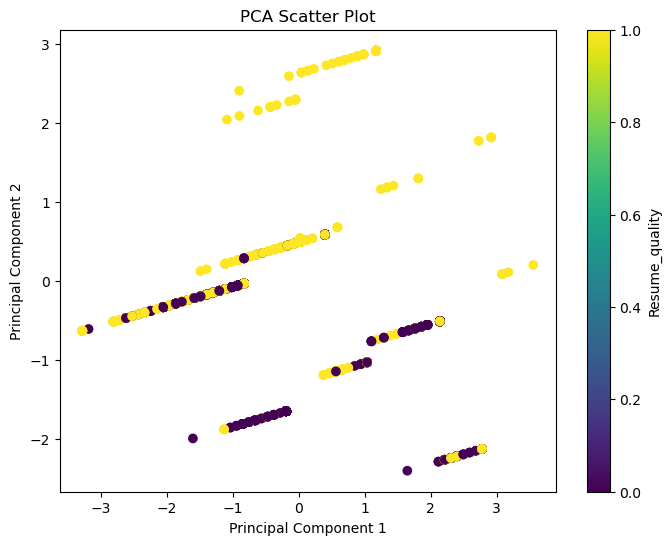

In [800]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['resume_quality'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Resume_quality')
plt.show()

In [801]:
#Let's look at correlations
for i in range(1,n_components+1):
    print(f'PCA{i} : CORR ==> ', df['resume_quality'].corr(pca_df[f'PC{i}']))

PCA1 : CORR ==>  0.006735527624860608
PCA2 : CORR ==>  0.008831395395265142
PCA3 : CORR ==>  -0.019291612070893655


In [802]:
#Let's use LDA
X = df[midcorr]
y = df['resume_quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [803]:
df['resume_quality'].corr(pd.Series(X_lda.flatten()))

-0.008395909276195736

### Results is very bad ,becouse data is non linear that's why we remove low corr columns

In [804]:
#Let's remove low correlation columns
for i in a:
    del df[i]

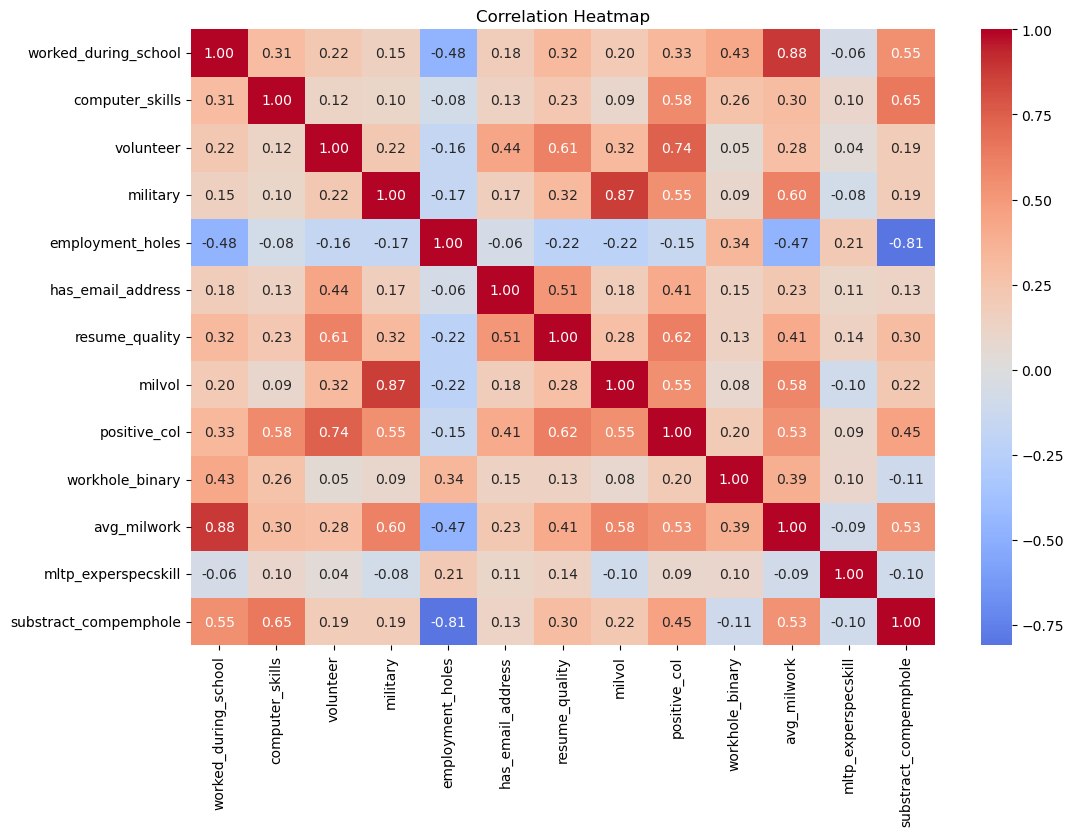

In [805]:
# Let's calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Inter correlation (VIF Score)

In [806]:
#Let's check up inter correlation
for i in df.columns:
    for d in df.columns:
        if i != d:  
            corr = df[i].corr(df[d])
            if corr > 0.9:
                print(f"Correlation between {i} and {d}: {corr:.2f}")
                corri = df[i].corr(df['resume_quality'])
                corrd = df[d].corr(df['resume_quality']) 
                print(f"{i} target corr: {corri:.4f} | {d} target corr: {corrd:.4f}")

In [807]:
#Let's check up correlation
df.corr()['resume_quality']

worked_during_school     0.320648
computer_skills          0.234092
volunteer                0.612006
military                 0.315053
employment_holes        -0.218448
has_email_address        0.505681
resume_quality           1.000000
milvol                   0.284504
positive_col             0.621984
workhole_binary          0.130325
avg_milwork              0.409848
mltp_experspecskill      0.141929
substract_compemphole    0.304268
Name: resume_quality, dtype: float64

### Re-balancing

In [808]:
#Let's check re-balancing
df["resume_quality"].value_counts()

resume_quality
1    2434
0    2411
Name: count, dtype: int64

### Modeling – What modeling techniques should we apply?

#### Random Forest Classifier

In [847]:
# Split data into features and target
X = df.drop(columns = ['resume_quality'], axis=1)
y = df['resume_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=400, random_state=42, max_depth = 5)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
y_predtr = rf_classifier.predict(X_train)
accuracyrf = accuracy_score(y_test, y_pred)
accuracyrfs = accuracy_score(y_train, y_predtr)

In [810]:
#Let's look at f-score
from sklearn.metrics import f1_score
fr = f1_score(y_test, y_pred)
print(f'F1 Score: {fr:.4f}')

F1 Score: 0.8715


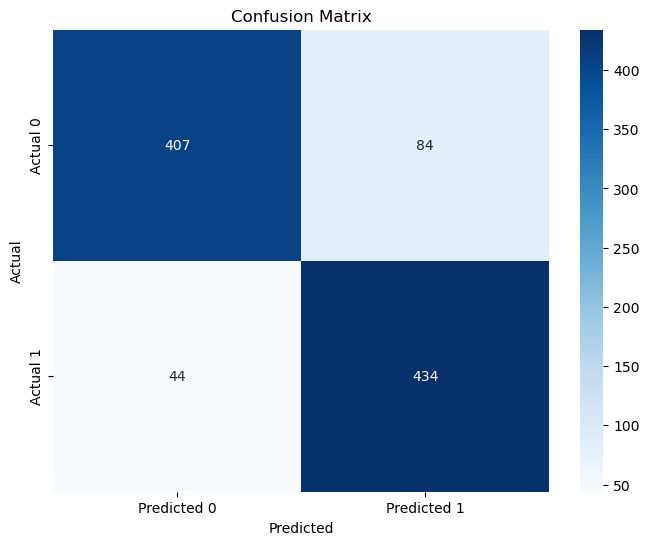

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       491
           1       0.84      0.91      0.87       478

    accuracy                           0.87       969
   macro avg       0.87      0.87      0.87       969
weighted avg       0.87      0.87      0.87       969



In [811]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

#### Random Forest Classifier / Random Search

In [812]:
#Let's do random search in random forest classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

In [813]:
#Best Parameters: {'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(
    n_estimators=80,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='log2',
    bootstrap=True
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_predtr = model.predict(X_train)

accuracyrfr = accuracy_score(y_test, y_pred)
accuracyrfrt = accuracy_score(y_train, y_predtr)

In [814]:
#Let's look at f-score
frr = f1_score(y_test, y_pred)
print(f'F1 Score: {frr:.4f}')

F1 Score: 0.8737


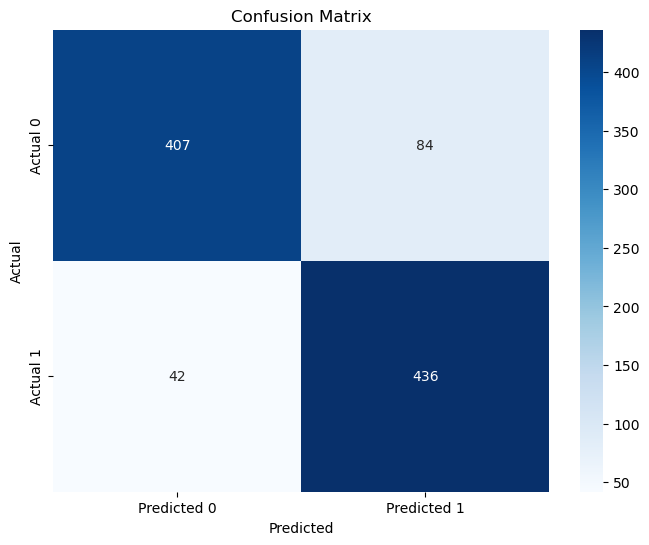

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       491
           1       0.84      0.91      0.87       478

    accuracy                           0.87       969
   macro avg       0.87      0.87      0.87       969
weighted avg       0.87      0.87      0.87       969



In [815]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

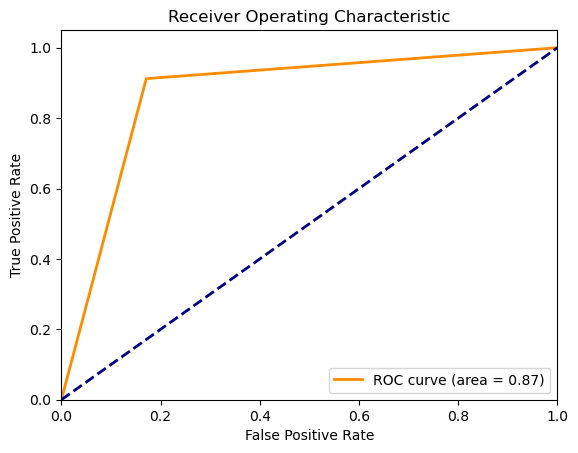

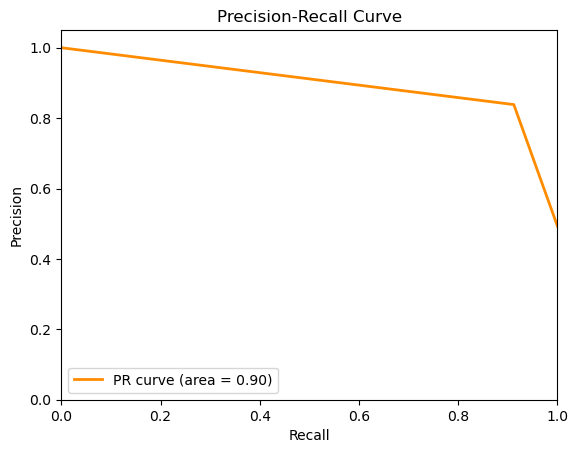

In [816]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### Feature Importance

In [817]:
#Let's look at importance of features
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
7,positive_col,0.320377
2,volunteer,0.249865
5,has_email_address,0.175702
9,avg_milwork,0.065579
10,mltp_experspecskill,0.038318
0,worked_during_school,0.037258
3,military,0.033914
11,substract_compemphole,0.033019
4,employment_holes,0.018013
6,milvol,0.012802


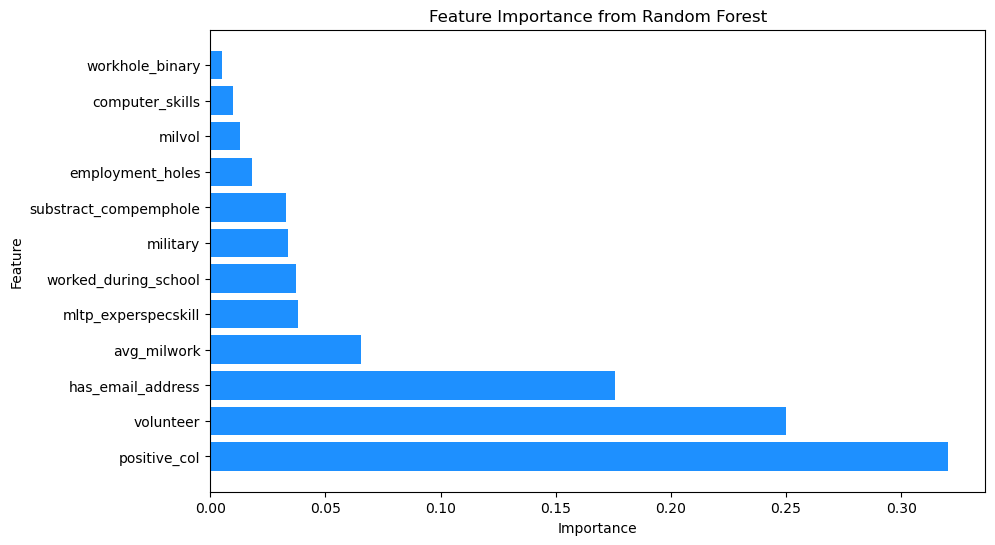

In [818]:
#Let's look at importances in chart
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

#### Gradient Boosting 

In [819]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,  
    max_depth=3,  
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0, 
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_predtr = gb_model.predict(X_train)

accuracygb = accuracy_score(y_test, y_pred)
accuracygbs = accuracy_score(y_train, y_predtr)

In [820]:
#Let's look at f-score
fg = f1_score(y_test, y_pred)
print(f'F1 Score: {fg:.4f}')

F1 Score: 0.8766


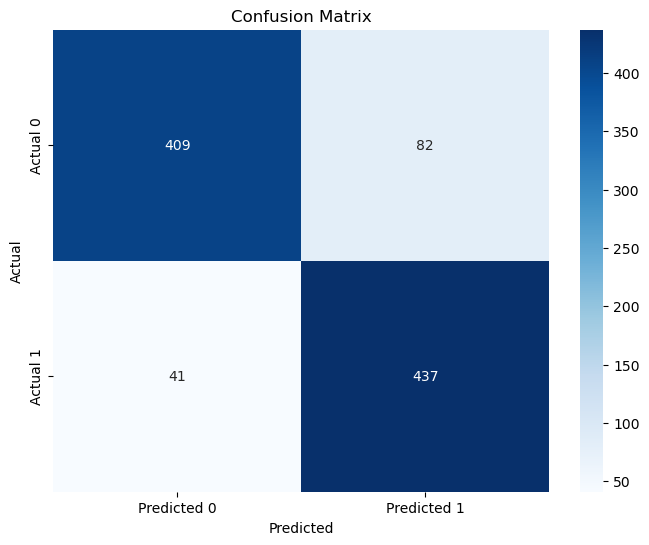

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       491
           1       0.84      0.91      0.88       478

    accuracy                           0.87       969
   macro avg       0.88      0.87      0.87       969
weighted avg       0.88      0.87      0.87       969



In [821]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

#### Gradient Boosting / Random Search

In [822]:
#Let's do random search in Gradient Boosting
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 12),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
gb_model = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='accuracy', 
    cv=5, 
    verbose=2,  
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracygbr = accuracy_score(y_test, y_pred)

In [850]:
df1 = df.copy()

In [862]:
# Best parameters: {'subsample': 1.0, 'n_estimators': 70, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}
from sklearn.ensemble import GradientBoostingClassifier
for i in df.columns:
    for z in df.columns: 
        if i > z:
            X = df.drop(columns = ['resume_quality',i,z], axis=1)
            y = df['resume_quality']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            gb_model = GradientBoostingClassifier(
                n_estimators=250, 
                learning_rate=0.2,  
                max_depth=5,  
                min_samples_split=6,
                min_samples_leaf=4,
                subsample=1.0, 
                max_features ='log2',
                random_state=42
            )
            gb_model.fit(X_train, y_train)
            y_pred = gb_model.predict(X_test)
            y_predtr = gb_model.predict(X_train)

            accuracygbr = accuracy_score(y_test, y_pred)
            accuracygbsr = accuracy_score(y_train, y_predtr)
                #Let's look at f-score
            print(f"If you remove {i} ,{z} then your f-score:")
            fgr = f1_score(y_test, y_pred)
            print(f'F1 Score: {fgr:.4f}')

If you remove worked_during_school ,computer_skills then your f-score:
F1 Score: 0.8849
If you remove worked_during_school ,volunteer then your f-score:
F1 Score: 0.8726
If you remove worked_during_school ,military then your f-score:
F1 Score: 0.8806
If you remove worked_during_school ,employment_holes then your f-score:
F1 Score: 0.8806
If you remove worked_during_school ,has_email_address then your f-score:
F1 Score: 0.8598
If you remove worked_during_school ,resume_quality then your f-score:
F1 Score: 0.8805
If you remove worked_during_school ,milvol then your f-score:
F1 Score: 0.8818
If you remove worked_during_school ,positive_col then your f-score:
F1 Score: 0.8751
If you remove worked_during_school ,avg_milwork then your f-score:
F1 Score: 0.8668
If you remove worked_during_school ,mltp_experspecskill then your f-score:
F1 Score: 0.8619
If you remove worked_during_school ,substract_compemphole then your f-score:
F1 Score: 0.8833
If you remove computer_skills ,avg_milwork then y

In [865]:
# Best parameters: {'subsample': 1.0, 'n_estimators': 70, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}
from sklearn.ensemble import GradientBoostingClassifier
X = df.drop(columns = ['resume_quality','workhole_binary','substract_compemphole'], axis=1)
y = df['resume_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(
    n_estimators=250, 
    learning_rate=0.2,  
    max_depth=5,  
    min_samples_split=6,
    min_samples_leaf=4,
    subsample=1.0, 
    max_features ='log2',
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_predtr = gb_model.predict(X_train)

accuracygbr = accuracy_score(y_test, y_pred)
accuracygbsr = accuracy_score(y_train, y_predtr)

In [866]:
#Let's look at f-score
fgr = f1_score(y_test, y_pred)
print(f'F1 Score: {fgr:.4f}')

F1 Score: 0.8856


In [867]:
del df['substract_compemphole']
del df['workhole_binary']

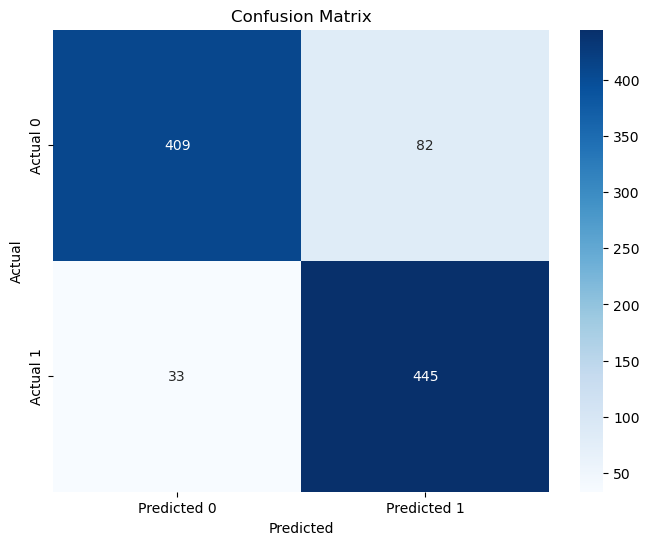

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       491
           1       0.84      0.93      0.89       478

    accuracy                           0.88       969
   macro avg       0.88      0.88      0.88       969
weighted avg       0.89      0.88      0.88       969



In [868]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

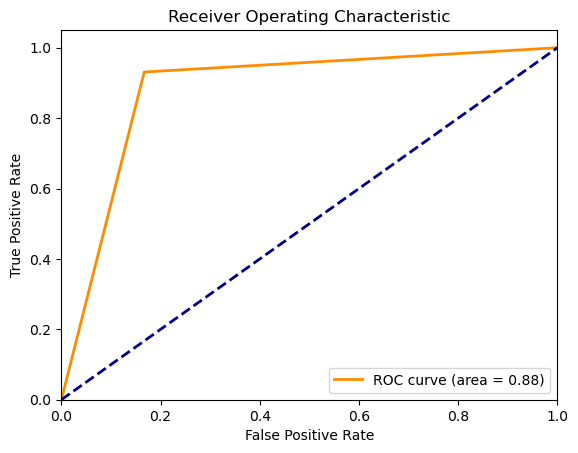

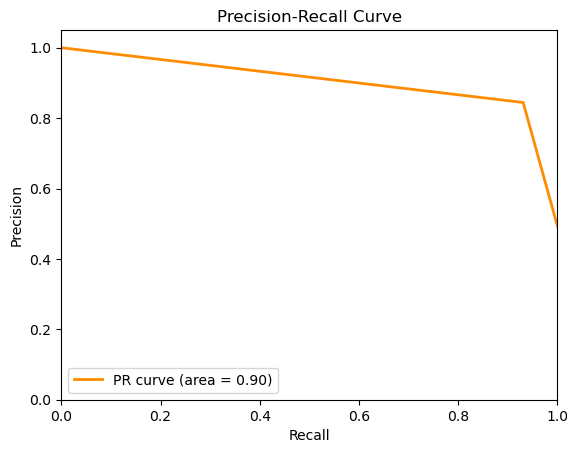

In [870]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### XGBoost

In [871]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns = ['resume_quality'], axis=1)
y = df['resume_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracyx = accuracy_score(y_test, y_pred)
accuracysx = accuracy_score(y_train, y_predtr)

In [872]:
#Let's look at f-score
fx = f1_score(y_test, y_pred)
print(f'F1 Score: {fx:.4f}')

F1 Score: 0.8827


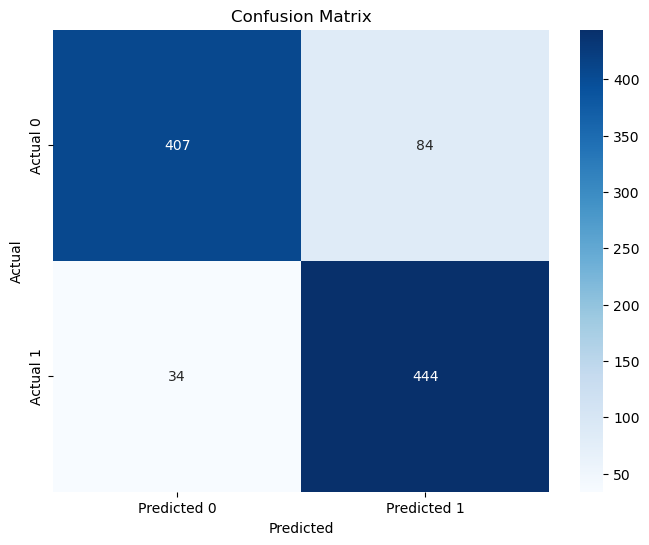

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       491
           1       0.84      0.93      0.88       478

    accuracy                           0.88       969
   macro avg       0.88      0.88      0.88       969
weighted avg       0.88      0.88      0.88       969



In [873]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

#### XGBoost / Random Search

In [830]:
#Let's do random search in XGBoost classifier
X = df.drop(columns = ['resume_quality'], axis=1)
y = df['resume_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 12),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy', 
    cv=5,  
    verbose=2, 
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

print("Test accuracy:", accuracy)

In [874]:
#Best parameters: {'subsample': 0.8, 'n_estimators': 140, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}
X = df.drop(columns = ['resume_quality'], axis=1)
y = df['resume_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = xgb.XGBClassifier(subsample= 0.8, 
                          n_estimators= 250, 
                          max_depth= 7, 
                          learning_rate= 0.3, 
                          gamma= 1, 
                          colsample_bytree= 0.9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracyxgr = accuracy_score(y_test, y_pred)
accuracyxgrs = accuracy_score(y_train, y_predtr)

In [875]:
#Let's look at f-score
fxr = f1_score(y_test, y_pred)
print(f'F1 Score: {fxr:.4f}')

F1 Score: 0.8785


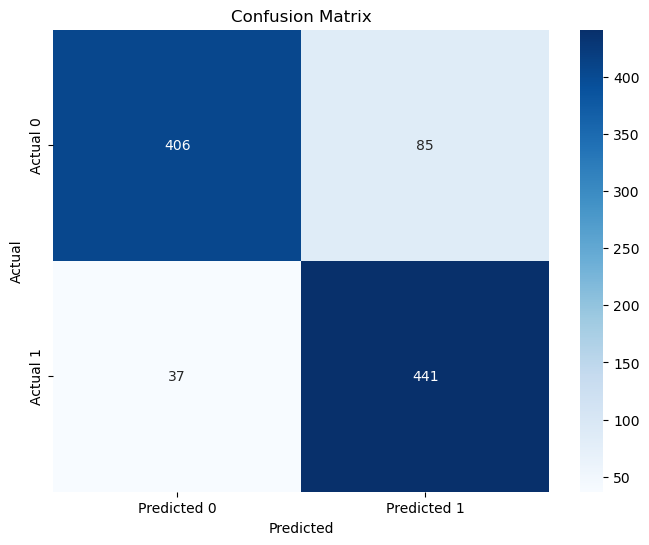

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       491
           1       0.84      0.92      0.88       478

    accuracy                           0.87       969
   macro avg       0.88      0.87      0.87       969
weighted avg       0.88      0.87      0.87       969



In [876]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

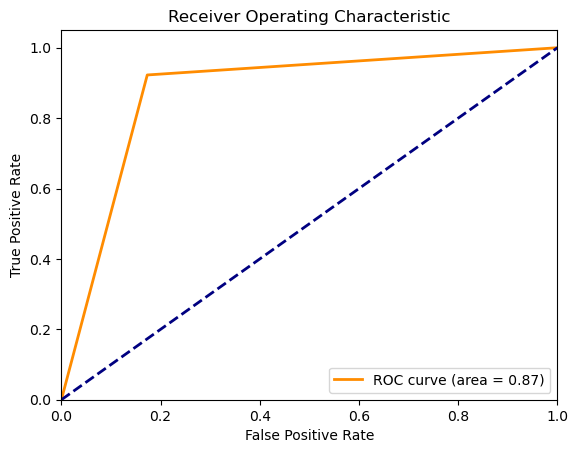

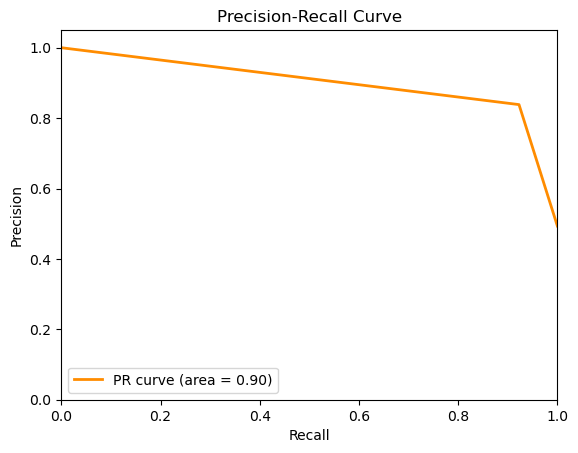

In [877]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [835]:
# Load the saved model from the Pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### Evaluation – Which model best meets the business objectives?

In [878]:
print('Random Forest:')
print(f"Accuracy of Test: {accuracyrf:.4f}")
print(f"Accuracy of Train: {accuracyrfs:.4f}")
print(f"F-score: {fr:.4f}")
print('========================================')
print('Random Forest (Random search):')
print(f"Accuracy of Test: {accuracyrfr:.4f}")
print(f"Accuracy of Train: {accuracyrfrt:.4f}")
print(f"F-score: {frr:.4f}")
print('========================================')
print('Gradient Boosting:')
print(f"Accuracy of Test: {accuracygb:.4f}")
print(f"Accuracy of Train: {accuracygbs:.4f}")
print(f"F-score: {fg:.4f}")
print('========================================')
print('Gradient Boosting (Random search):')
print(f"Accuracy of Test: {accuracygbr:.4f}")
print(f"Accuracy of Train: {accuracygbsr:.4f}")
print(f"F-score: {fgr:.4f}")
print('========================================')
print('Xgboost:')
print(f"Accuracy of Test: {accuracyx:.4f}")
print(f"Accuracy of Train: {accuracysx:.4f}")
print(f"F-score: {fx:.4f}")
print('========================================')
print('Xgboost (Random search):')
print(f"Accuracy of Test: {accuracyxgr:.4f}")
print(f"Accuracy of Train: {accuracyxgrs:.4f}")
print(f"F-score: {fxr:.4f}")

Random Forest:
Accuracy of Test: 0.8679
Accuracy of Train: 0.8733
F-score: 0.8715
Random Forest (Random search):
Accuracy of Test: 0.8700
Accuracy of Train: 0.8731
F-score: 0.8737
Gradient Boosting:
Accuracy of Test: 0.8731
Accuracy of Train: 0.8852
F-score: 0.8766
Gradient Boosting (Random search):
Accuracy of Test: 0.8813
Accuracy of Train: 0.8932
F-score: 0.8856
Xgboost:
Accuracy of Test: 0.8782
Accuracy of Train: 0.8932
F-score: 0.8827
Xgboost (Random search):
Accuracy of Test: 0.8741
Accuracy of Train: 0.8932
F-score: 0.8785


### The best model is - Random Forest

### Deployment – How do stakeholders access the results?

##### Model Pickle

In [837]:
#Let's dump to pickle file
with open('rf_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [879]:
df.to_csv('df1.csv')

In [842]:
df.columns

Index(['worked_during_school', 'computer_skills', 'volunteer', 'military',
       'employment_holes', 'has_email_address', 'resume_quality', 'milvol',
       'positive_col', 'workhole_binary', 'avg_milwork', 'mltp_experspecskill',
       'substract_compemphole'],
      dtype='object')

In [840]:
# Let's look at the changes in the data frame
# --------------------------------------------
# before - df:   #'job_ad_id', 'job_city', 'job_industry', 'job_type',,'computer_skills'
                 #'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
                 #'job_req_any', 'job_req_communication', 'job_req_education',
                 #'job_req_min_experience', 'job_req_computer', 'job_req_organization',
                 #'job_req_school', 'received_callback', 'firstname', 'race', 'gender',
                 #'years_college', 'college_degree', 'honors','years_experience'
                 #'worked_during_school', 'special_skills', 'volunteer',
                 #'military', 'employment_holes', 'has_email_address', 'resume_quality'
# -------------------------------------------------------------------------------------
# after  - df:   #'worked_during_school', 'computer_skills', 'volunteer', 'military',
                 #'employment_holes', 'has_email_address', 'resume_quality', 
                 #'milvol', 'avg_milwork', 'mltp_experspecskill','positive_col'

In [841]:
# Adding Columns: #'milvol'                - if row['volunteer'] == 1 and row['military'] == 1 else 0
                  #'avg_milwork'           - (df['military'] + df['worked_during_school'])/2
                  #'mltp_experspecskill'   - df['years_experience'] * df['special_skills']
                  #'positive_col'          - df[['honors',"computer_skills","volunteer","military"]].sum(axis = 1)

### The End